<center><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Header.png" width="1200" height="627" /></center>

---

# **Table of Contents**
---

1. [**Introduction**](#Section1)<br>
   1.1 [**Project Overview**](#Section11)<br>
   1.2 [**Current Practices and Challenges**](#Section12)<br>
   1.3 [**Our Role and Objectives**](#Section13)<br>
   1.4 [**Problem Specifics**](#Section14)<br>
   1.5 [**Data Sources**](#Section15)<br>

2. [**Data Acquisition and Preparation**](#Section2)<br>
   2.1 [**Installing and Importing Libraries**](#Section21)<br>
   2.2 [**Data Acquisition**](#Section22)<br>
   2.3 [**Data Description and Quality Check**](#Section23)<br>
   2.4 [**Data Transformation and Cleaning**](#Section24)<br>

3. [**Exploratory Data Analysis**](#Section3)<br>
   3.1 [**Overview of Employee Data**](#Section31)<br>
   3.2 [**Satisfaction Change Analysis**](#Section32)<br>
   3.3 [**Departmental Analysis**](#Section33)<br>
   3.4 [**Job Satisfaction Scores Distribution**](#Section34)<br>
   3.5 [**Average Monthly Hours Worked by Employees**](#Section35)<br>
   3.6 [**Gender & Marital Status distribution Among Employees with Increasing/Decreasing Satisfaction**](#Section36)<br>
   3.7 [**Income Level vs. Job Satisfaction**](#Section37)<br>
   3.8 [**Employment Tenure Distribution**](#Section38)<br>
   
4. [**Employee Attrition Prediction Model**](#Section4)<br>
   4.1 [**Feature Selection with Correlation Matrix**](#Section41)<br>
   4.2 [**Encoding Categorical Variables**](#Section42)<br>
   4.3 [**Balancing Dataset with SMOTE**](#Section43)<br>
   4.4 [**Feature Scaling**](#Section44)<br>

5. [**Model Development & Evaluation**](#Section5)<br>
   5.1 [**Splitting Data and Initializing Classifiers**](#Section51)<br>
   5.2 [**Training Classifiers and Evaluating F1 Scores**](#Section52)<br>
   5.3 [**Selecting the Best Classifier**](#Section53)<br>

6. [**Submission**](#Section6)<br>
   6.1 [**Creating Predictions and Saving Submission File**](#Section61)<br>

7. [**Recommendations and Action Plan**](#Section7)<br>
   7.1 [**Proactive HR Strategies**](#Section71)<br>
   7.2 [**Retention Policy Recommendations**](#Section72)<br>
   7.3 [**Communication and Feedback Loop**](#Section73)<br>

---
<a name="Section1"></a>
# **1. Introduction**
---

## 1.1 Project Overview

Our client, the Human Resources (HR) Department of a prominent software company, has embarked on a mission to enhance employee retention through data-driven strategies. The core objective of this initiative is to employ predictive analytics to identify employees who are at risk of leaving the company. By proactively identifying and addressing potential attrition, HR aims to foster a more engaged and satisfied workforce.

## 1.2 Current Practices and Challenges

The current practice employed by the HR Department involves conducting exit interviews with departing employees to gather insights into their reasons for leaving. However, this approach presents several challenges:

1. **Haphazard Insights:** The quality and depth of insights obtained through exit interviews vary greatly depending on the skills of the interviewer. This inconsistency hinders the HR Department's ability to gain meaningful and actionable insights.

2. **Lack of Aggregated Data:** Insights collected through exit interviews are typically isolated and cannot be effectively aggregated or cross-referenced across multiple employees who have left. This limits the ability to identify overarching patterns or trends.

3. **Timing:** By the time policy changes are implemented based on exit interview findings, it may be too late to prevent attrition, resulting in valuable talent loss.


<p align="center"><img src="https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/Images/hr.gif"></p>

## 1.3 Our Role and Objectives

In response to these challenges, the HR Department has enlisted us as data science consultants to implement a proactive approach to employee retention. Our primary task is to develop a robust classification model that predicts whether an employee is likely to leave the company. By harnessing historical employee data, we aim to provide HR with a tool that can identify at-risk employees well in advance, allowing for timely intervention.

## 1.4 Problem Specifics

- **Deliverable:** Our goal is to predict whether an employee will stay with the company or leave.

- **Machine Learning Task:** This project falls under the classification domain.

- **Target Variable:** The target variable is 'Status,' indicating whether an employee is currently employed or has left the company.

- **Win Condition:** Given that this is a unique problem for the company, there is no predefined quantifiable win condition. Our objective is to build the most effective predictive model possible.

---
<a name = Section1></a>
# **2. Data Preparation and Acquisition**
---

<a name = Section21></a>
### **2.1 Installing and Importing Libraries**

In [403]:
!pip install -q datascience                                         # Package that is required by pandas profiling
!pip install -q pandas-profiling                                    # Library to generate basic statistics about data
!pip install -q scikit-learn
!pip install -q category_encoders
!pip install -q imbalanced-learn
!pip install -q matplotlib seaborn                                 # Libraries for data visualization
!pip install -q mysql-connector                                    # Library for connecting to MySQL databases

In [404]:
!pip install -q --upgrade pandas-profiling
!pip install -q --upgrade scikit-learn imbalanced-learn
!pip install -q --upgrade scikit-learn imbalanced-learn

In [405]:
import os  # For operating system related operations
import mysql.connector  # For connecting to MySQL database
#-------------------------------------------------------------------------------------------------------------------------------
import pandas as pd  # For data manipulation and analysis

# Configure pandas display options for better readability

pd.set_option('display.max_columns', None)  # Display all columns in DataFrame
pd.set_option('display.max_colwidth', None)  # Display full width of columns
pd.set_option('display.max_rows', None)  # Display all rows in DataFrame
pd.set_option('mode.chained_assignment', None)  # Allow chained assignment operations
pd.set_option('display.float_format', lambda x: '%.2f' % x)  # Display float values with 2 decimal places
#-------------------------------------------------------------------------------------------------------------------------------
import numpy as np  # For numerical computations
np.set_printoptions(precision=2, suppress=True)  # Set numpy print options
#-------------------------------------------------------------------------------------------------------------------------------
import matplotlib.pyplot as plt  # Importing pyplot interface to use matplotlib
import seaborn as sns  # Importing seaborn library for interactive visualization
%matplotlib inline
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.preprocessing import StandardScaler                    # Importing StandardScaler for data normalization
from sklearn.preprocessing import LabelEncoder                      # Importing LabelEncoder for label encoding
from sklearn.preprocessing import OneHotEncoder                     # Importing OneHotEncoder for one-hot encoding
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.linear_model import LogisticRegression                # Importing LogisticRegression classifier
from sklearn.svm import SVC                                         # Importing Support Vector Classifier (SVC)
from sklearn.tree import DecisionTreeClassifier                     # Importing Decision Tree Classifier
from sklearn.ensemble import RandomForestClassifier                 # Importing Random Forest Classifier
from sklearn.ensemble import GradientBoostingClassifier             # Importing Gradient Boosting Classifier
from sklearn.naive_bayes import GaussianNB                          # Importing Gaussian Naive Bayes Classifier
#-------------------------------------------------------------------------------------------------------------------------------
from sklearn.metrics import f1_score                                # Importing f1_score for model evaluation
from sklearn.model_selection import GridSearchCV                    # Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import train_test_split                # Importing train_test_split for data splitting
#-------------------------------------------------------------------------------------------------------------------------------
from imblearn.over_sampling import SMOTE                            # Importing SMOTE for handling imbalanced data
#-------------------------------------------------------------------------------------------------------------------------------
from ipywidgets import interact  # Importing interact for creating UI controls
import warnings  # Importing warning to disable runtime warnings
import multiprocessing  # For multiprocessing operations
warnings.filterwarnings("ignore")  # Warnings will appear only once
#-------------------------------------------------------------------------------------------------------------------------------

<a name = Section22></a>
### **2.2 Data Acquisition**

In this preliminary step of our project, we have successfully acquired the essential datasets required for our analysis. These datasets are sourced from various aspects of the organization's operations and will serve as the foundation for our data-driven insights.

Here is an overview of the obtained data tables:

1. Department Data

- Shape: The 'Department Data' table contains information about the organization's departments and is structured into 11 rows and 3 columns.
- Features: The table's features include 'dept_id' for unique department identification, 'dept_name' denoting the department's name, and 'dept_head' indicating the name of the department head.

2. Employee Details Data

- Shape: The 'Employee Details Data' table comprises a comprehensive dataset about employees, with 14,245 rows and 4 columns.
- Features: The dataset features include 'employee_id' for unique employee identification, 'age' indicating the age of each employee, 'gender' specifying their gender, and 'marital_status' detailing the marital status of employees.

3. Employee Data

- Shape: The 'Employee Data' table is rich in information, encompassing 14,150 rows and 11 columns.
- Features: This dataset includes essential features such as 'avg_monthly_hrs' denoting the average number of hours worked per month, 'department' specifying the department to which employees belong, 'filed_complaint' indicating whether an employee has filed a formal complaint in the last 3 years, 'last_evaluation' providing the score of the most recent evaluation, 'n_projects' indicating the number of projects an employee has worked on, 'recently_promoted' signaling if the employee was promoted in the last 3 years, 'salary' representing the salary level relative to their department, 'satisfaction' quantifying employee satisfaction (higher values indicate greater satisfaction), 'status' reflecting the current employment status ('Employed' or 'Left'), 'tenure' specifying the number of years an employee has been with the company, and 'employee_id' for unique employee identification.

These meticulously structured datasets will serve as the cornerstone for our data exploration, analysis, and subsequent decision-making processes as we progress through this project.

In [406]:
# Connection details
cnx = mysql.connector.connect(
    host="cpanel.insaid.co",
    user="student",
    passwd="student",
    database="Capstone2"
)

# Query and retrieve data from the 'department_data' table
query_department_data = "SELECT * FROM department_data"
df_department_data_sql = pd.read_sql(query_department_data, con=cnx)

# Query and retrieve data from the 'employee_details_data' table
query_employee_details_data = "SELECT * FROM employee_details_data"
df_employee_details_data_sql = pd.read_sql(query_employee_details_data, con=cnx)

# Query and retrieve data from the 'employee_data' table
query_employee_data = "SELECT * FROM employee_data"
df_employee_data_sql = pd.read_sql(query_employee_data, con=cnx)

# Close the database connection
cnx.close()

In [407]:
# Print the shape and features of the SQL DataFrames
print('Department Data Shape:', df_department_data_sql.shape)
print('Department Data Features:', df_department_data_sql.columns)

print('\n' + '-'*25 + '\n')

print('Employee Details Data Shape:', df_employee_details_data_sql.shape)
print('Employee Details Data Features:', df_employee_details_data_sql.columns)

print('\n' + '-'*25 + '\n')

print('Employee Data Shape:', df_employee_data_sql.shape)
print('Employee Data Features:', df_employee_data_sql.columns)

Department Data Shape: (11, 3)
Department Data Features: Index(['dept_id', 'dept_name', 'dept_head'], dtype='object')

-------------------------

Employee Details Data Shape: (14245, 4)
Employee Details Data Features: Index(['employee_id', 'age', 'gender', 'marital_status'], dtype='object')

-------------------------

Employee Data Shape: (14150, 11)
Employee Data Features: Index(['avg_monthly_hrs', 'department', 'filed_complaint', 'last_evaluation',
       'n_projects', 'recently_promoted', 'salary', 'satisfaction', 'status',
       'tenure', 'employee_id'],
      dtype='object')


In [408]:
df_test = pd.read_csv('https://raw.githubusercontent.com/Mihir-Ai-lab/Academic-Projects/main/ML%20Projects/ACS/GCD_Capstone_Project_unseen_data.csv')
df_train = df_employee_data_sql

In [409]:
print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)

Training Data Shape: (14150, 11)
Test Data Shape: (100, 10)

-------------------------

Training Data Head

----------



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,NaN,0.87,6,NaN,medium,0.13,Left,4.00,124467
1,134.00,None,NaN,0.56,2,NaN,low,0.51,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47,2,NaN,medium,0.41,Left,3.00,126150
3,256.00,D00-SP,NaN,0.96,6,NaN,low,0.15,Left,4.00,125346
4,146.00,D00-SS,NaN,0.51,2,NaN,medium,0.43,Left,3.00,113707
5,135.00,D00-MT,NaN,0.48,2,NaN,low,0.38,Left,3.00,121685
6,270.00,D00-PD,NaN,0.87,6,NaN,low,0.17,Left,4.00,119912
7,244.00,D00-IT,NaN,0.93,6,NaN,medium,0.06,Left,5.00,112868
8,289.00,D00-IT,NaN,0.93,7,NaN,low,0.16,Left,4.00,122314
9,281.00,D00-SS,NaN,0.91,6,NaN,medium,0.11,Left,4.00,122394


<a name = Section23></a>
### **2.3 Data Description and Quality Check**

In [410]:
# Check data types in the Employee Data
data_types_employee_data = df_train.dtypes
print("\nData Types in Employee Data:")
print(data_types_employee_data)


Data Types in Employee Data:
avg_monthly_hrs      float64
department            object
filed_complaint      float64
last_evaluation      float64
n_projects             int64
recently_promoted    float64
salary                object
satisfaction         float64
status                object
tenure               float64
employee_id            int64
dtype: object


In [411]:
# Check data types in the Department Data
data_types_department_data = df_department_data_sql.dtypes
print("Data Types in Department Data:")
print(data_types_department_data)

# Check data types in the Employee Details Data
data_types_employee_details_data = df_employee_details_data_sql.dtypes
print("\nData Types in Employee Details Data:")
print(data_types_employee_details_data)

Data Types in Department Data:
dept_id      object
dept_name    object
dept_head    object
dtype: object

Data Types in Employee Details Data:
employee_id        int64
age                int64
gender            object
marital_status    object
dtype: object


In [412]:
df_train.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
0,246.00,None,NaN,0.87,6,NaN,medium,0.13,Left,4.00,124467
1,134.00,None,NaN,0.56,2,NaN,low,0.51,Left,3.00,112210
2,156.00,D00-SS,1.00,0.47,2,NaN,medium,0.41,Left,3.00,126150
3,256.00,D00-SP,NaN,0.96,6,NaN,low,0.15,Left,4.00,125346
4,146.00,D00-SS,NaN,0.51,2,NaN,medium,0.43,Left,3.00,113707


In [413]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14150 entries, 0 to 14149
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   avg_monthly_hrs    14150 non-null  float64
 1   department         13443 non-null  object 
 2   filed_complaint    2046 non-null   float64
 3   last_evaluation    12663 non-null  float64
 4   n_projects         14150 non-null  int64  
 5   recently_promoted  297 non-null    float64
 6   salary             14150 non-null  object 
 7   satisfaction       14000 non-null  float64
 8   status             14150 non-null  object 
 9   tenure             14000 non-null  float64
 10  employee_id        14150 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 1.2+ MB


In [414]:
df_train.describe(include='all')

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
count,14150.00,13443,2046.00,12663.00,14150.00,297.00,14150,14000.00,14150,14000.00,14150.00
unique,NaN,12,NaN,NaN,NaN,NaN,3,NaN,2,NaN,NaN
top,NaN,D00-SS,NaN,NaN,NaN,NaN,low,NaN,Employed,NaN,NaN
freq,NaN,3905,NaN,NaN,NaN,NaN,6906,NaN,10784,NaN,NaN
mean,199.99,NaN,1.00,0.72,3.78,1.00,NaN,0.62,NaN,3.50,112080.75
std,50.83,NaN,0.00,0.17,1.25,0.00,NaN,0.25,NaN,1.46,8748.20
min,49.00,NaN,1.00,0.32,1.00,1.00,NaN,0.04,NaN,2.00,0.00
25%,155.00,NaN,1.00,0.56,3.00,1.00,NaN,0.45,NaN,3.00,105772.50
50%,199.00,NaN,1.00,0.72,4.00,1.00,NaN,0.65,NaN,3.00,111291.50
75%,245.00,NaN,1.00,0.87,5.00,1.00,NaN,0.82,NaN,4.00,116650.75


In [415]:
def convert_and_fill(df):
    columns_to_convert = ['avg_monthly_hrs', 'filed_complaint', 'recently_promoted', 'tenure']
    columns_to_category = ['salary', 'status']

    for column in columns_to_convert:
        df[column] = df[column].fillna(0).astype('int64')

    for column in columns_to_category:
        if column in df.columns:
            df[column] = df[column].astype('category')

# Apply the conversions and fill missing values for df_train
convert_and_fill(df_train)

# Apply the same conversions and fill missing values for df_test
convert_and_fill(df_test)

<a name = Section24></a>
### **2.4 Data Transformation and Cleaning**

### Objectives:

Clean and preprocess the data to handle missing values, outliers, and inconsistencies. This will involve:

- Identifying and handling missing values in the datasets.
- Detecting and addressing outliers or erroneous data points.
- Resolving any inconsistencies or discrepancies in the data.

In [416]:
# Rows with employee IDs as 0 are invalid, so let's remove them
zero_employee_id_rows = df_train[df_train['employee_id'] == 0]
print("Rows with employee ID 0:")
zero_employee_id_rows

Rows with employee ID 0:


,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id
34,284,D00-SS,0,0.85,6,0,low,0.07,Left,4,0
304,264,D00-ENG,0,0.77,6,0,low,0.11,Left,4,0
1234,129,D00-SP,0,0.40,2,0,medium,0.44,Left,3,0
11304,167,None,0,0.88,5,0,low,0.68,Employed,3,0
12304,259,D00-ENG,0,0.51,5,0,low,0.63,Employed,4,0


### Handling Duplicates

In [417]:
# Define a function to drop duplicates and reset the index
def drop_duplicates_and_reset_index(df):
    # Get the initial number of rows
    initial_rows = df.shape[0]
    
    # Filter out rows where employee ID is 0 (for Employee Data only)
    if 'employee_id' in df.columns:
        df_filtered = df[df['employee_id'] != 0]
    else:
        df_filtered = df
    
    # Drop duplicate rows while keeping the first occurrence
    df_cleaned = df_filtered.drop_duplicates(keep='first')
    
    # Get the final number of rows after dropping duplicates
    final_rows = df_cleaned.shape[0]
    
    # Calculate the number of entries deleted
    entries_deleted = initial_rows - final_rows
    
    # Reset the index to ensure it is consecutive
    df_cleaned = df_cleaned.reset_index(drop=True)
    
    return df_cleaned, entries_deleted

# Filter out rows with employee ID 0 (in Employee Data only)
df_train = df_train[df_train['employee_id'] != 0]

# Drop duplicates in the Department Data
df_department_data_sql, deleted_entries_dept = drop_duplicates_and_reset_index(df_department_data_sql)

# Drop duplicates in the Employee Details Data
df_employee_details_data_sql, deleted_entries_details = drop_duplicates_and_reset_index(df_employee_details_data_sql)

# Drop duplicates in the Employee Data
df_train, deleted_entries_employee = drop_duplicates_and_reset_index(df_train)

# Print the number of entries deleted for each dataframe
print("Entries deleted due to dropping duplicates (Department Data):", deleted_entries_dept)
print("Entries deleted due to dropping duplicates (Employee Details Data):", deleted_entries_details)
print("Entries deleted due to dropping duplicates (Employee Data):", deleted_entries_employee)

Entries deleted due to dropping duplicates (Department Data): 0
Entries deleted due to dropping duplicates (Employee Details Data): 0
Entries deleted due to dropping duplicates (Employee Data): 29


In [418]:
df_train.shape

(14116, 11)

### Merging Datasets

### Using df_employee_details_data_sql dataset to get the Age, Gender & Marital Status of the employees

In [419]:
def merge_employee_data(df, employee_details_data):
    df = df.merge(employee_details_data, on='employee_id', how='left')
    return df

df_train = merge_employee_data(df_train, df_employee_details_data_sql)
df_test = merge_employee_data(df_test, df_employee_details_data_sql)

In [420]:
# Review the 'department' column
print("Review the 'department' column:")
df_train['department'].value_counts()

Review the 'department' column:


D00-SS     3895
D00-ENG    2573
D00-SP     2108
D00-IT     1152
D00-PD      853
D00-MT      812
D00-FN      722
D00-MN      590
-IT         207
D00-AD      175
D00-PR      173
D00-TP      150
Name: department, dtype: int64

In [421]:
def clean_department_column(df):
    # Replace '-IT' with 'D00-IT' in the 'department' column
    df['department'].replace({'-IT': 'D00-IT'}, inplace=True)
    
    # Replace null values in the 'department' column with 'D00-UN'
    df['department'].fillna('D00-UN', inplace=True)

# Apply the function to both df_train and df_test
clean_department_column(df_train)
clean_department_column(df_test)

In [422]:
df_train.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status
0,246,D00-UN,0,0.87,6,0,medium,0.13,Left,4,124467,42,Female,Married
1,134,D00-UN,0,0.56,2,0,low,0.51,Left,3,112210,23,Female,Unmarried
2,156,D00-SS,1,0.47,2,0,medium,0.41,Left,3,126150,24,Female,Unmarried
3,256,D00-SP,0,0.96,6,0,low,0.15,Left,4,125346,51,Female,Married
4,146,D00-SS,0,0.51,2,0,medium,0.43,Left,3,113707,23,Female,Unmarried


In [423]:
def merge_department_data(df, department_data):
    # Renaming the columns in the department_data DataFrame
    department_data.rename(columns={
        'dept_id': 'dept_id_department',
        'dept_name': 'dept_name_department',
        'dept_head': 'dept_head_department'
    }, inplace=True)

    # Merge the data based on 'department' and 'dept_id_department'
    df = df.merge(department_data, left_on='department', right_on='dept_id_department', how='left')
    return df

# Merge department data into df_train
df_train = merge_department_data(df_train, df_department_data_sql)

# Merge department data into df_test
df_test = merge_department_data(df_test, df_department_data_sql)

In [424]:
df_train.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_id_department,dept_name_department,dept_head_department
0,246,D00-UN,0,0.87,6,0,medium,0.13,Left,4,124467,42,Female,Married,NaN,NaN,NaN
1,134,D00-UN,0,0.56,2,0,low,0.51,Left,3,112210,23,Female,Unmarried,NaN,NaN,NaN
2,156,D00-SS,1,0.47,2,0,medium,0.41,Left,3,126150,24,Female,Unmarried,D00-SS,Sales,Edward J Bayley
3,256,D00-SP,0,0.96,6,0,low,0.15,Left,4,125346,51,Female,Married,D00-SP,Support,Amelia Westray
4,146,D00-SS,0,0.51,2,0,medium,0.43,Left,3,113707,23,Female,Unmarried,D00-SS,Sales,Edward J Bayley


In [425]:
df_test.head()

,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,tenure,employee_id,age,gender,marital_status,dept_id_department,dept_name_department,dept_head_department
0,134,D00-IT,0,0.53,2,0,low,0.40,3,119045,27,Male,Unmarried,D00-IT,IT,Henry Adey
1,221,D00-PD,0,0.78,2,0,low,0.76,3,112223,23,Male,Unmarried,D00-PD,Product,Darcy Staines
2,156,D00-SS,0,0.55,2,0,medium,0.34,3,103924,26,Male,Unmarried,D00-SS,Sales,Edward J Bayley
3,133,D00-PR,0,NaN,4,0,medium,0.83,2,105922,52,Male,Married,D00-PR,Procurement,Louie Viles
4,135,D00-SS,0,0.45,2,0,low,0.32,5,103297,27,Male,Unmarried,D00-SS,Sales,Edward J Bayley


In [426]:
def preprocess_data(df):
    # Drop the redundant 'dept_id_department' column
    if 'dept_id_department' in df.columns:
        df.drop(columns='dept_id_department', inplace=True)
    
    # Fill NaN values in 'dept_name' and 'dept_head' with 'Unknown'
    df['dept_name_department'].fillna('Unknown', inplace=True)
    df['dept_head_department'].fillna('Unknown', inplace=True)

# Apply the function to both df_train and df_test
preprocess_data(df_train)
preprocess_data(df_test)

### Handle missing values

In [427]:
print("NaN value counts in the cleaned dataframe:")
df_train.isnull().sum()

NaN value counts in the cleaned dataframe:


avg_monthly_hrs            0
department                 0
filed_complaint            0
last_evaluation         1487
n_projects                 0
recently_promoted          0
salary                     0
satisfaction             150
status                     0
tenure                     0
employee_id                0
age                        0
gender                     0
marital_status             0
dept_name_department       0
dept_head_department       0
dtype: int64

In [428]:
# Filter employees with missing 'satisfaction'
missing_satisfaction_df = df_train[df_train['satisfaction'].isnull()]

# Extract unique tenure values for employees with missing 'satisfaction'
unique_missing_satisfaction_tenure = missing_satisfaction_df['tenure'].unique()

# Display unique tenure values for employees with missing 'satisfaction'
print("Unique tenure values of employees with missing 'satisfaction':")
print(unique_missing_satisfaction_tenure)

Unique tenure values of employees with missing 'satisfaction':
[0]


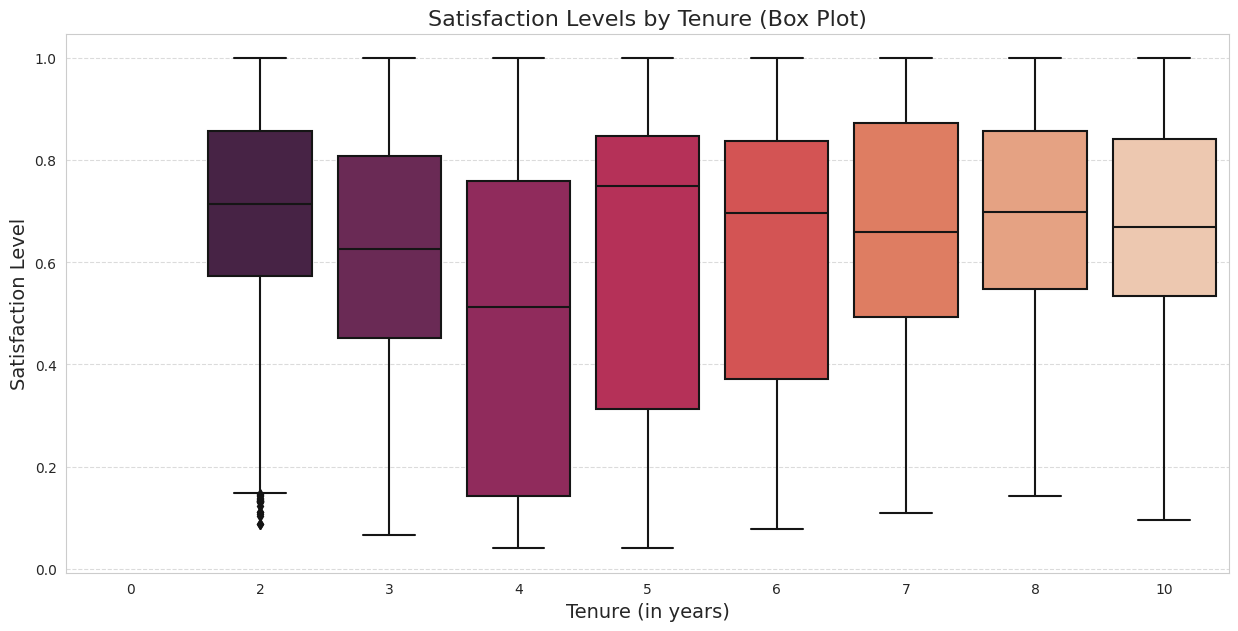

In [429]:
# Set the "rocket" color palette
sns.set_palette("rocket")

# Create a box plot on a 15x7 canvas
plt.figure(figsize=(15, 7))
sns.boxplot(x='tenure', y='satisfaction', data=df_train, palette="rocket")
plt.xlabel('Tenure (in years)', fontsize=14)
plt.ylabel('Satisfaction Level', fontsize=14)
plt.title('Satisfaction Levels by Tenure (Box Plot)', fontsize=16)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

In [430]:
def impute_satisfaction_with_mean(df):
    # Calculate the mean of 'satisfaction'
    mean_satisfaction = df['satisfaction'].mean()
    
    # Impute missing 'satisfaction' values with the mean
    df['satisfaction'].fillna(mean_satisfaction, inplace=True)

# Apply the function to both df_train and df_test
impute_satisfaction_with_mean(df_train)
impute_satisfaction_with_mean(df_test)

In [431]:
# Filter employees with missing 'last_evaluation_score'
missing_last_evaluation_df = df_train[df_train['last_evaluation'].isnull()]

# Create a crosstab to see the relationship between departments and missing 'last_evaluation_score'
crosstab = pd.crosstab(missing_last_evaluation_df['dept_name_department'], missing_last_evaluation_df['tenure'])

# Display the crosstab
print("Crosstab of department and employment tenure for employees with missing 'last_evaluation':")
print(crosstab)

Crosstab of department and employment tenure for employees with missing 'last_evaluation':
tenure                  0    2    3
dept_name_department               
Admin                   0    7   15
Engineering             0   83  159
Finance                 0   23   39
IT                      0   44  100
Management              0   16   41
Marketing               0   23   60
Procurement             0    6   11
Product                 0   21   70
Sales                   0  125  222
Support                 0   76  130
Temp                  150    0    0
Unknown                 0   16   50


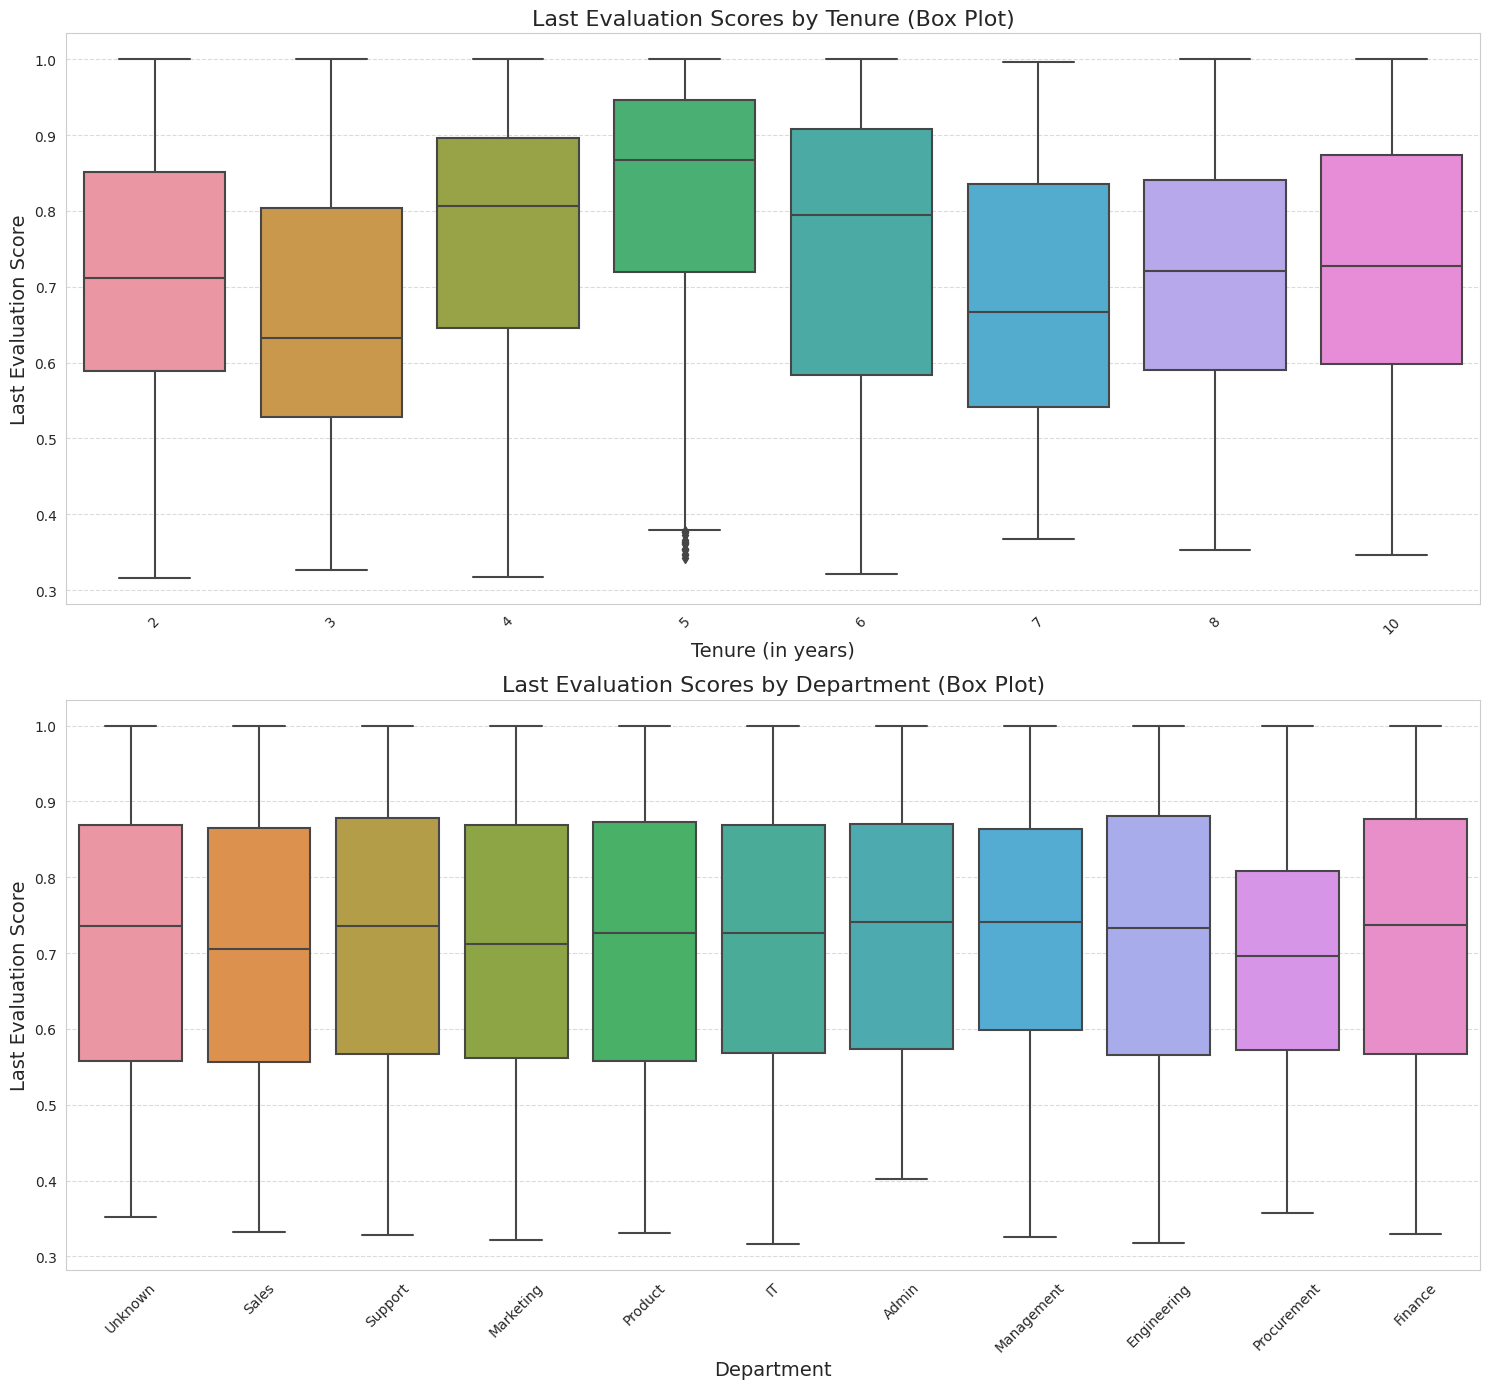

In [432]:
# Filter employees with non-missing 'last_evaluation_score'
non_missing_last_evaluation_df = df_train.dropna(subset=['last_evaluation'])

# Create subplots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 14))

# Set the "rocket" color palette
sns.set_palette("rocket")

# Create a box plot of 'last_evaluation' scores by tenure
sns.boxplot(data=non_missing_last_evaluation_df, x='tenure', y='last_evaluation', ax=ax1)
ax1.set_xlabel('Tenure (in years)', fontsize=14)
ax1.set_ylabel('Last Evaluation Score', fontsize=14)
ax1.set_title('Last Evaluation Scores by Tenure (Box Plot)', fontsize=16)
ax1.grid(axis='y', linestyle='--', alpha=0.7)

# Create a box plot of 'last_evaluation' scores by department
sns.boxplot(data=non_missing_last_evaluation_df, x='dept_name_department', y='last_evaluation', ax=ax2)
ax2.set_xlabel('Department', fontsize=14)
ax2.set_ylabel('Last Evaluation Score', fontsize=14)
ax2.set_title('Last Evaluation Scores by Department (Box Plot)', fontsize=16)
ax2.grid(axis='y', linestyle='--', alpha=0.7)

# Rotate x-axis labels for better readability
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=45)
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=45)

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

In [433]:
def impute_last_evaluation(df):
    # Calculate the mean 'last_evaluation' scores for non-zero tenure employees
    mean_last_evaluation_non_zero = df[df['tenure'] > 0]['last_evaluation'].mean()
    
    # Impute missing 'last_evaluation' for 0 tenure employees
    df.loc[(df['tenure'] == 0) & df['last_evaluation'].isnull(), 'last_evaluation'] = mean_last_evaluation_non_zero
    
    # Impute missing 'last_evaluation' for non-zero tenure employees
    df['last_evaluation'].fillna(df.groupby('tenure')['last_evaluation'].transform('mean'), inplace=True)

# Apply the function to both df_train and df_test
impute_last_evaluation(df_train)
impute_last_evaluation(df_test)

In [434]:
df_train.isnull().sum()

avg_monthly_hrs         0
department              0
filed_complaint         0
last_evaluation         0
n_projects              0
recently_promoted       0
salary                  0
satisfaction            0
status                  0
tenure                  0
employee_id             0
age                     0
gender                  0
marital_status          0
dept_name_department    0
dept_head_department    0
dtype: int64

### Verifying the integrity of the merged dataset by checking for consistency across the common columns.

In [435]:
# Extracting Categorical & Numerical columns to perform further analysis & cleaning
categorical_cols = df_train.select_dtypes('object').columns
numerical_cols = df_train.select_dtypes(['int64', 'float64']).columns

# Checking Unique Values and Null Counts in Dataset by taking a sample and displaying a few unique values
print('\n' + 'Having a look at unique values and null counts in each column')
print('\n' + '-'*50 + '\n')

for col in df_train.columns:
    unique_vals = df_train[col].unique()
    num_unique = len(unique_vals)
    null_count = df_train[col].isnull().sum()

    print(f"Column Name: {col}\n")
    if col in categorical_cols:
        print(f"Data Type: Categorical | Unique Values: {num_unique} | Null Count: {null_count}\n")
        print(unique_vals[:30])  # Display only 30 unique values for categorical columns
    else:
        print(f"Data Type: Numerical | Unique Values: {num_unique} | Null Count: {null_count}\n")
        print(df_train[col].sample(300).unique()[:10])

    print('\n' + '-'*70 + '\n')


Having a look at unique values and null counts in each column

--------------------------------------------------

Column Name: avg_monthly_hrs

Data Type: Numerical | Unique Values: 249 | Null Count: 0

[174 130 172 191 159 234 224 286 198 215]

----------------------------------------------------------------------

Column Name: department

Data Type: Categorical | Unique Values: 12 | Null Count: 0

['D00-UN' 'D00-SS' 'D00-SP' 'D00-MT' 'D00-PD' 'D00-IT' 'D00-AD' 'D00-MN'
 'D00-ENG' 'D00-PR' 'D00-TP' 'D00-FN']

----------------------------------------------------------------------

Column Name: filed_complaint

Data Type: Numerical | Unique Values: 2 | Null Count: 0

[0 1]

----------------------------------------------------------------------

Column Name: last_evaluation

Data Type: Numerical | Unique Values: 12187 | Null Count: 0

[0.67 0.5  0.65 0.59 0.72 0.84 0.82 1.   0.93 0.5 ]

----------------------------------------------------------------------

Column Name: n_projects

Dat

---
<a name = Section3></a>
# **3. Exploratory Data Analysis**
---

<a name = Section31></a>
### **3.1 Overview of Employee Data**

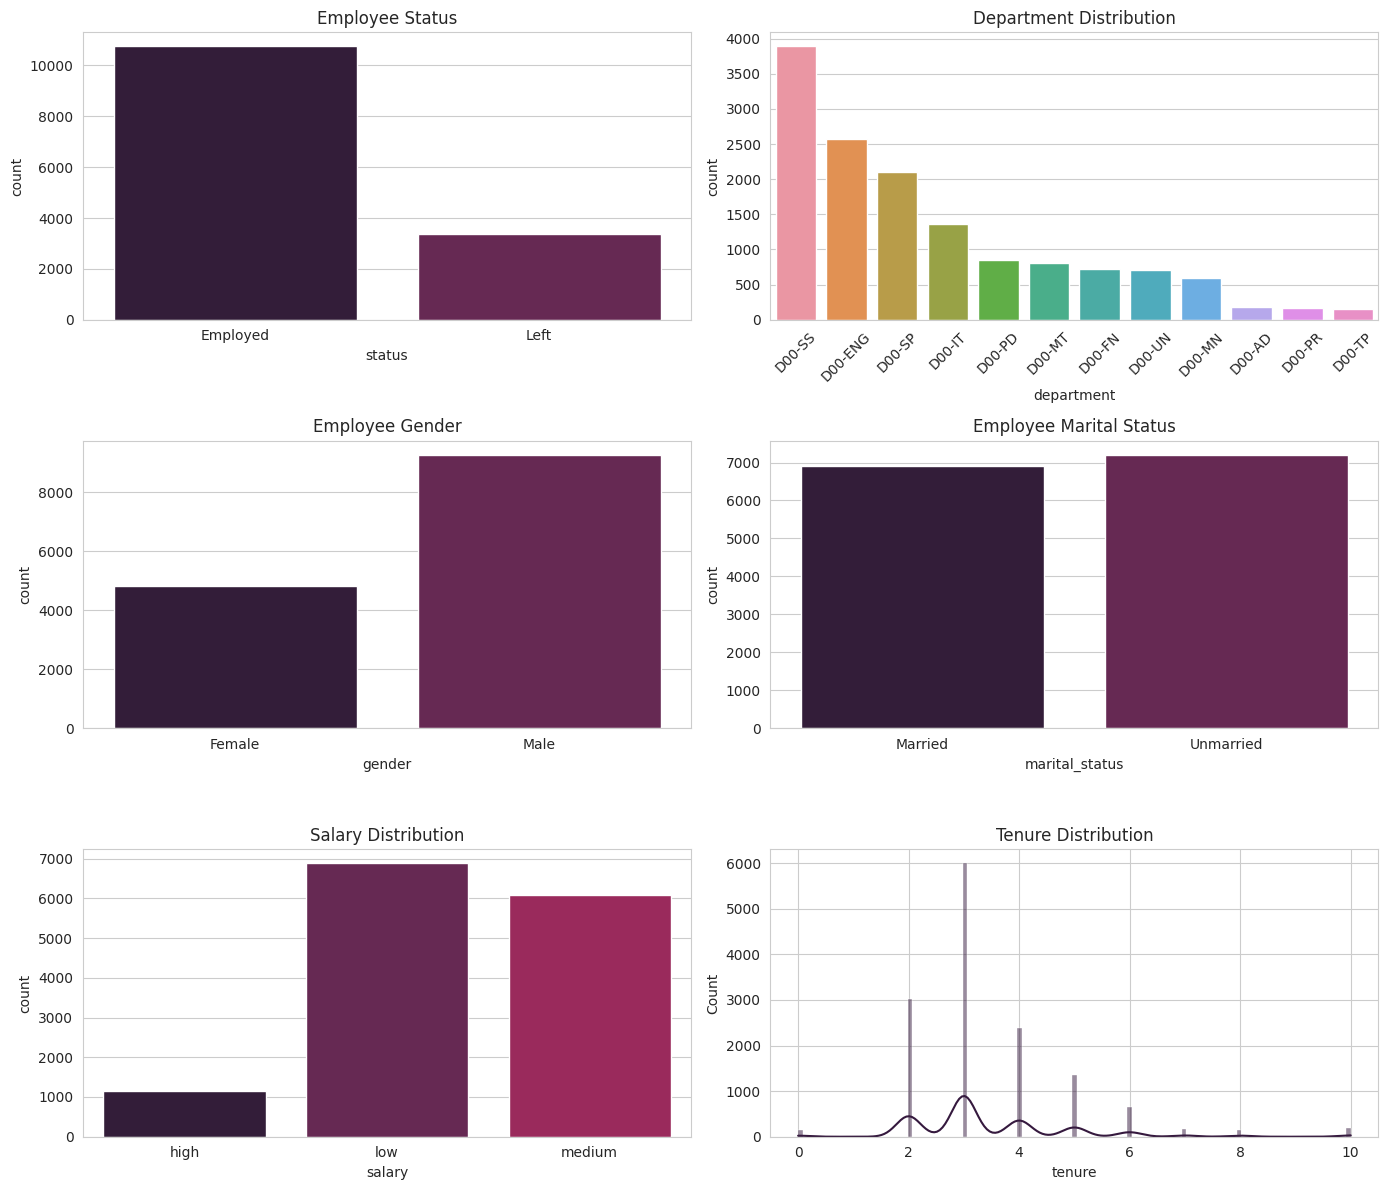

In [436]:
# Set the style of the plots
sns.set_style("whitegrid")

# Create subplots
fig, axes = plt.subplots(3, 2, figsize=(14, 12))

# Plot 1: Employee Status
sns.countplot(data=df_train, x='status', ax=axes[0, 0])
axes[0, 0].set_title('Employee Status')

# Plot 2: Department Distribution
sns.countplot(data=df_train, x='department', ax=axes[0, 1], order=df_train['department'].value_counts().index)
axes[0, 1].set_title('Department Distribution')
axes[0, 1].tick_params(axis='x', rotation=45)

# Plot 3: Employee Gender
sns.countplot(data=df_train, x='gender', ax=axes[1, 0])
axes[1, 0].set_title('Employee Gender')

# Plot 4: Employee Marital Status
sns.countplot(data=df_train, x='marital_status', ax=axes[1, 1])
axes[1, 1].set_title('Employee Marital Status')

# Plot 5: Salary Distribution
sns.countplot(data=df_train, x='salary', ax=axes[2, 0])
axes[2, 0].set_title('Salary Distribution')

# Plot 6: Tenure Distribution
sns.histplot(data=df_train, x='tenure', kde=True, ax=axes[2, 1])
axes[2, 1].set_title('Tenure Distribution')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

### Observations

1. **Employee Status:** 
   - A significant proportion of employees have left the organization, indicating a notable attrition rate.

2. **Department Distribution:**
   - Most employees are from the Sales department, followed by Engineering and Support. 
   - Notably, there are relatively fewer employees in the Admin and Procurement departments. This underrepresentation may lead to challenges in recruiting and retaining employees in these departments.
   - This observation raises the question of whether understaffing in certain departments affects employee evaluations, as evident from the high number of missing values in evaluation-related columns.

3. **Gender Distribution:**
   - The organization has a higher number of male employees compared to female employees, suggesting a gender imbalance.

4. **Marital Status:**
   - A higher number of employees are categorized as "Unmarried" compared to "Married."
   - It might be valuable to analyze the mean age of unmarried employees to gain insights into this group's characteristics.

5. **Salary Distribution:**
   - The majority of employees fall into the "low" salary category, followed by the "medium" salary category. 
   - There are significantly fewer employees in the "high" salary category. This distribution can impact job satisfaction and attrition.

6. **Tenure Distribution:**
   - Most employees have a tenure of 3 years, with the majority of employees having tenures ranging from 2 to 4 years.
   - This suggests a range of experience levels within the company and hints at the extent of attrition.

<a name = Section32></a>
### **3.2 Satisfaction Change Analysis**

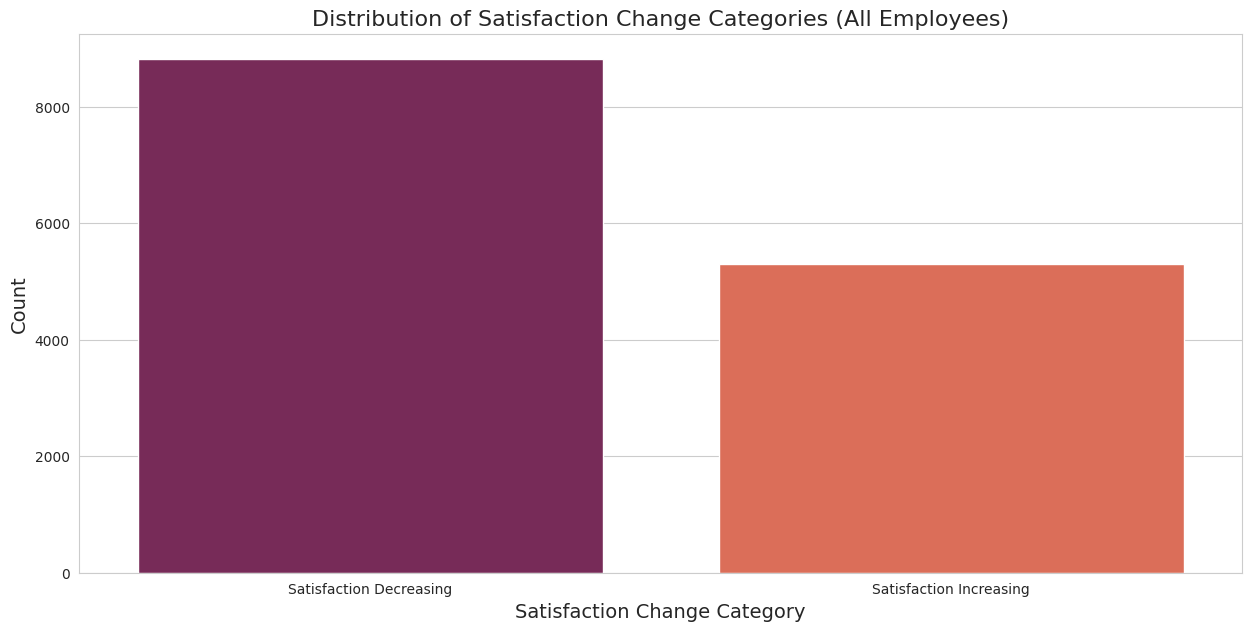

In [437]:
# Calculate satisfaction change
df_train['satisfaction_change'] = df_train['satisfaction'] - df_train['last_evaluation']
df_test['satisfaction_change'] = df_test['satisfaction'] - df_test['last_evaluation']

# Categorize satisfaction change
df_train['satisfaction_change_category'] = pd.cut(df_train['satisfaction_change'], 
                                                  bins=[-np.inf, 0, np.inf],
                                                  labels=['Satisfaction Decreasing', 'Satisfaction Increasing'])
df_test['satisfaction_change_category'] = pd.cut(df_test['satisfaction_change'], 
                                                 bins=[-np.inf, 0, np.inf],
                                                 labels=['Satisfaction Decreasing', 'Satisfaction Increasing'])

# Create separate dataframes for employees with increasing and decreasing satisfaction
increasing_satisfaction = df_train[df_train['satisfaction_change'] > 0]
decreasing_satisfaction = df_train[df_train['satisfaction_change'] < 0]

# Set the style of the plot
sns.set_style("whitegrid")

# Create a countplot for the satisfaction change category for all employees
plt.figure(figsize=(15, 7))
sns.countplot(data=df_train, x="satisfaction_change_category", palette="rocket")

# Set plot labels and title
plt.xlabel("Satisfaction Change Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Satisfaction Change Categories (All Employees)", fontsize=16)

# Show the plot
plt.show()

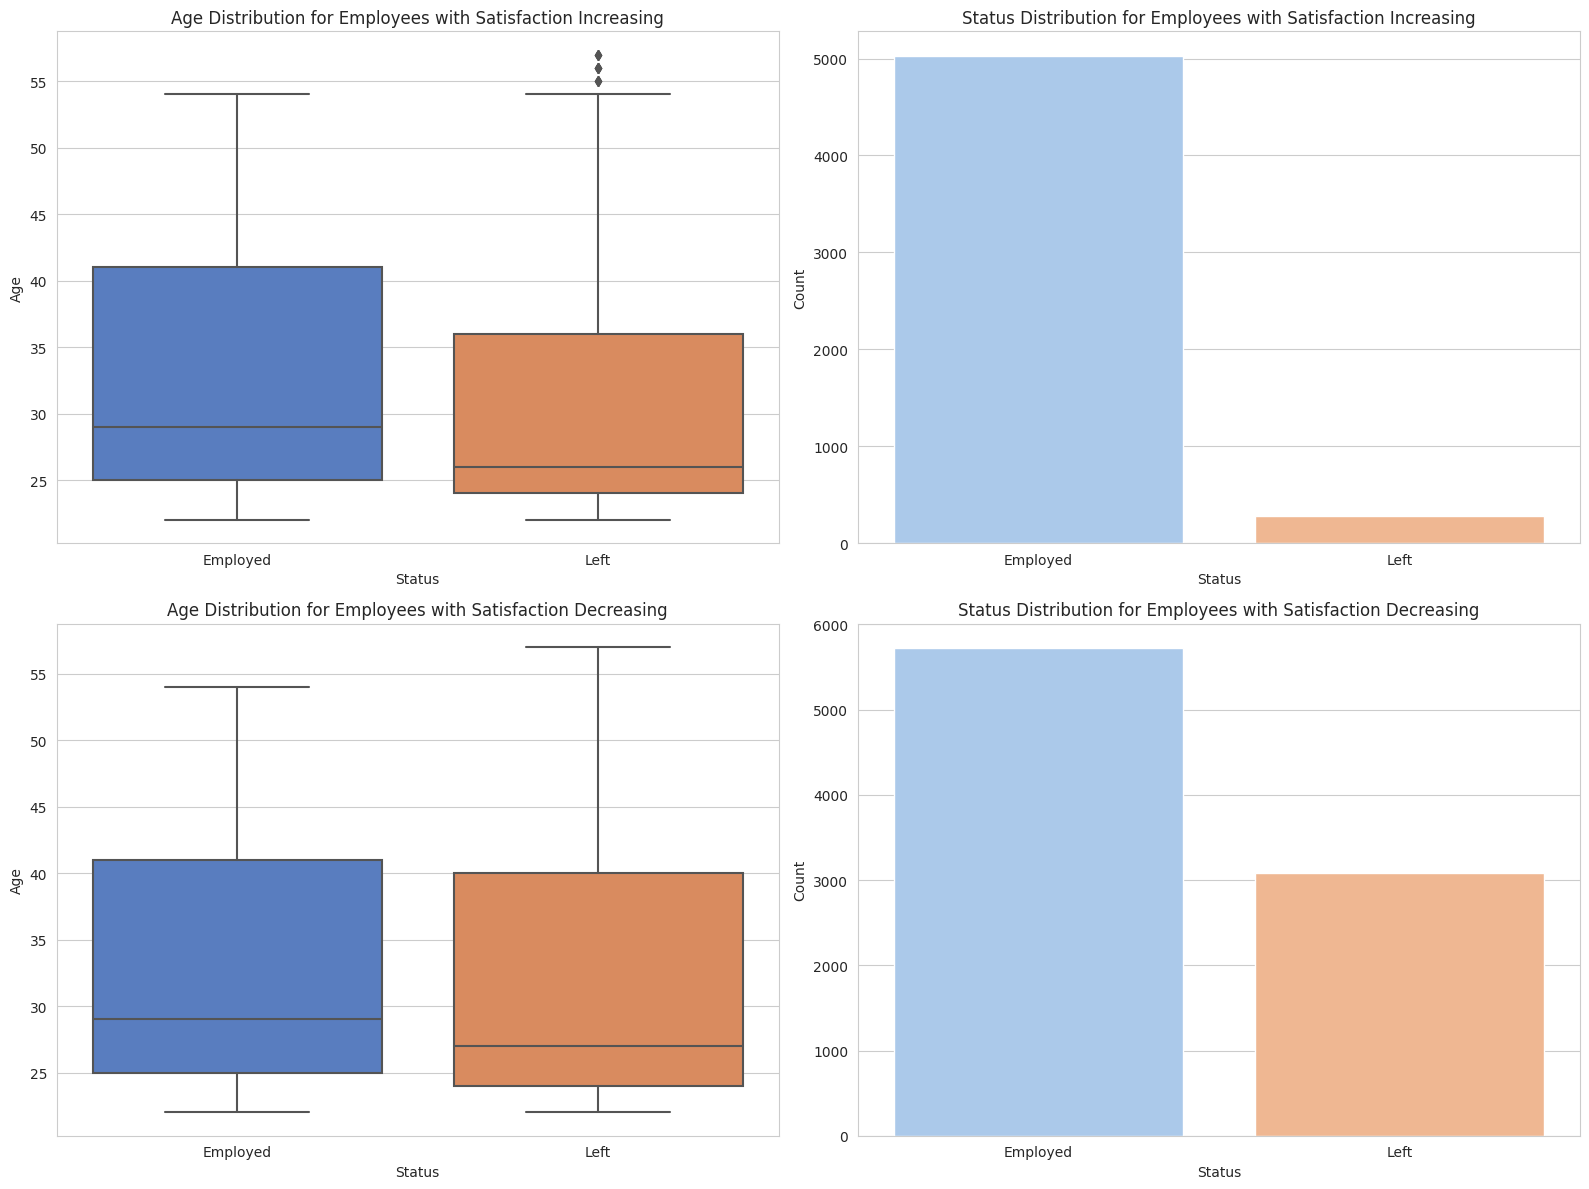

In [438]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Box plot for age for employees with increasing satisfaction
sns.boxplot(data=increasing_satisfaction, x='status', y='age', ax=axes[0, 0], palette="muted")
axes[0, 0].set_title('Age Distribution for Employees with Satisfaction Increasing')
axes[0, 0].set_xlabel('Status')
axes[0, 0].set_ylabel('Age')

# Countplot for status for employees with increasing satisfaction
sns.countplot(data=increasing_satisfaction, x='status', ax=axes[0, 1], palette="pastel")
axes[0, 1].set_title('Status Distribution for Employees with Satisfaction Increasing')
axes[0, 1].set_xlabel('Status')
axes[0, 1].set_ylabel('Count')

# Box plot for age for employees with decreasing satisfaction
sns.boxplot(data=decreasing_satisfaction, x='status', y='age', ax=axes[1, 0], palette="muted")
axes[1, 0].set_title('Age Distribution for Employees with Satisfaction Decreasing')
axes[1, 0].set_xlabel('Status')
axes[1, 0].set_ylabel('Age')

# Countplot for status for employees with decreasing satisfaction
sns.countplot(data=decreasing_satisfaction, x='status', ax=axes[1, 1], palette="pastel")
axes[1, 1].set_title('Status Distribution for Employees with Satisfaction Decreasing')
axes[1, 1].set_xlabel('Status')
axes[1, 1].set_ylabel('Count')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

### Observations

The "Left" employment status is more prevalent in the "Satisfaction Decreasing" group, suggesting that a significant number of employees have left the organization due to declining job satisfaction, highlighting a notable trend in attrition.

<a name = Section33></a>
### **3.3 Departmental Analysis**

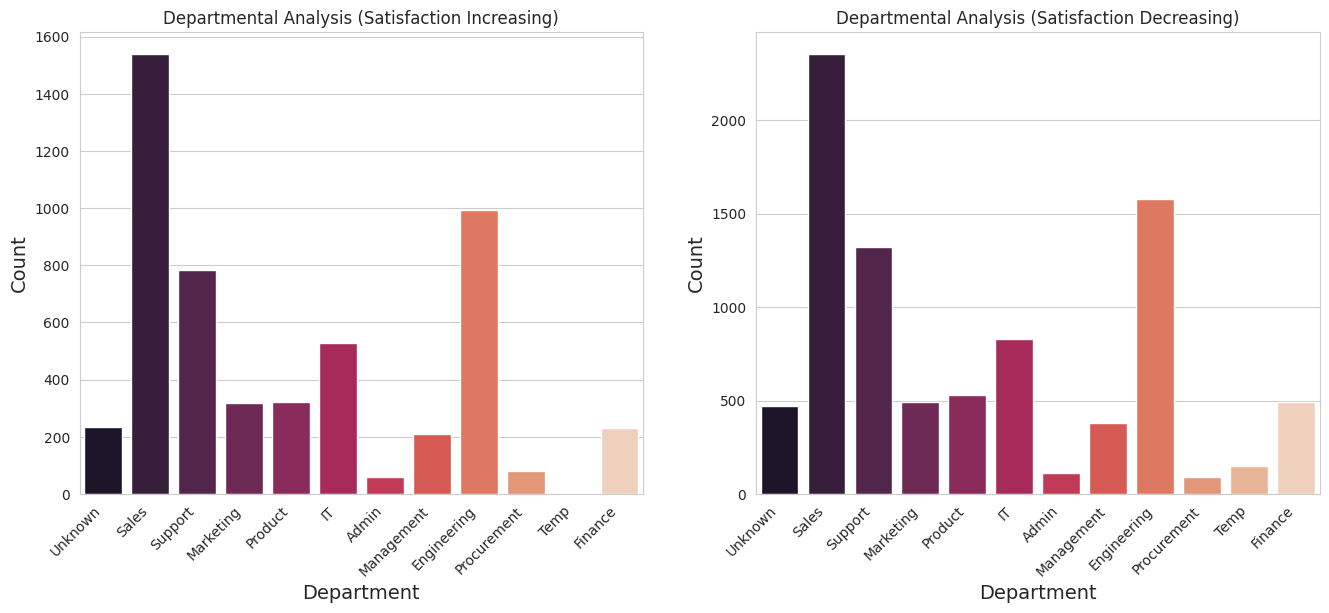

In [439]:
# Define the order of department categories
dept_order = df_train['dept_name_department'].unique()

# Create a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Departmental Analysis for employees with increasing satisfaction
sns.countplot(data=increasing_satisfaction, x="dept_name_department", ax=axes[0], palette="rocket", order=dept_order)
axes[0].set_title('Departmental Analysis (Satisfaction Increasing)')
axes[0].set_xlabel("Department", fontsize=14)
axes[0].set_ylabel("Count", fontsize=14)

# Departmental Analysis for employees with decreasing satisfaction
sns.countplot(data=decreasing_satisfaction, x="dept_name_department", ax=axes[1], palette="rocket", order=dept_order)
axes[1].set_title('Departmental Analysis (Satisfaction Decreasing)')
axes[1].set_xlabel("Department", fontsize=14)
axes[1].set_ylabel("Count", fontsize=14)

# Rotate x-axis labels for better readability
for ax in axes:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")

# Show the plots
plt.show()

### Observations

In departments such as "Sales," "Engineering," "Support," "IT," "Product," and "Marketing," the ratios of employees with decreasing satisfaction are higher, indicating potential areas of concern for job satisfaction.

The "Admin" department also shows a significant number of employees with decreasing satisfaction, despite having fewer employees.

The "Procurement" department stands out with a higher ratio of employees experiencing increasing satisfaction, which is a positive trend.

<a name = Section34></a>
### **3.4 Job Satisfaction Scores Distribution**

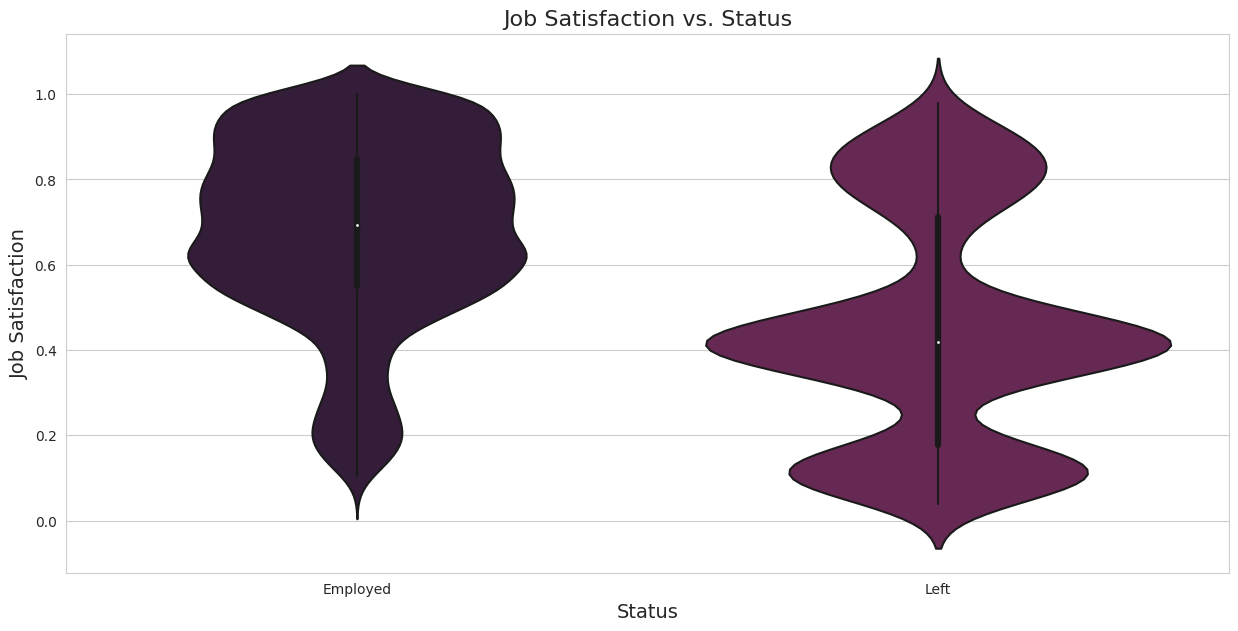

In [440]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a violin plot for job satisfaction vs. status
plt.figure(figsize=(15, 7))

sns.violinplot(data=df_train, x="status", y="satisfaction")

# Set plot labels and title
plt.xlabel("Status", fontsize=14)
plt.ylabel("Job Satisfaction", fontsize=14)
plt.title("Job Satisfaction vs. Status", fontsize=16)

# Show the plot
plt.show()

### Observations

"Employed" employees generally have higher job satisfaction scores, while "Left" employees show a broader distribution with some reporting lower satisfaction scores. This suggests that job satisfaction may play a role in employees leaving the organization, but other factors likely contribute as well. The bimodal pattern for "Left" employees indicates potential complexities in attrition causes.

<a name = Section35></a>
### **3.5 Average Monthly Hours Worked by Employees**

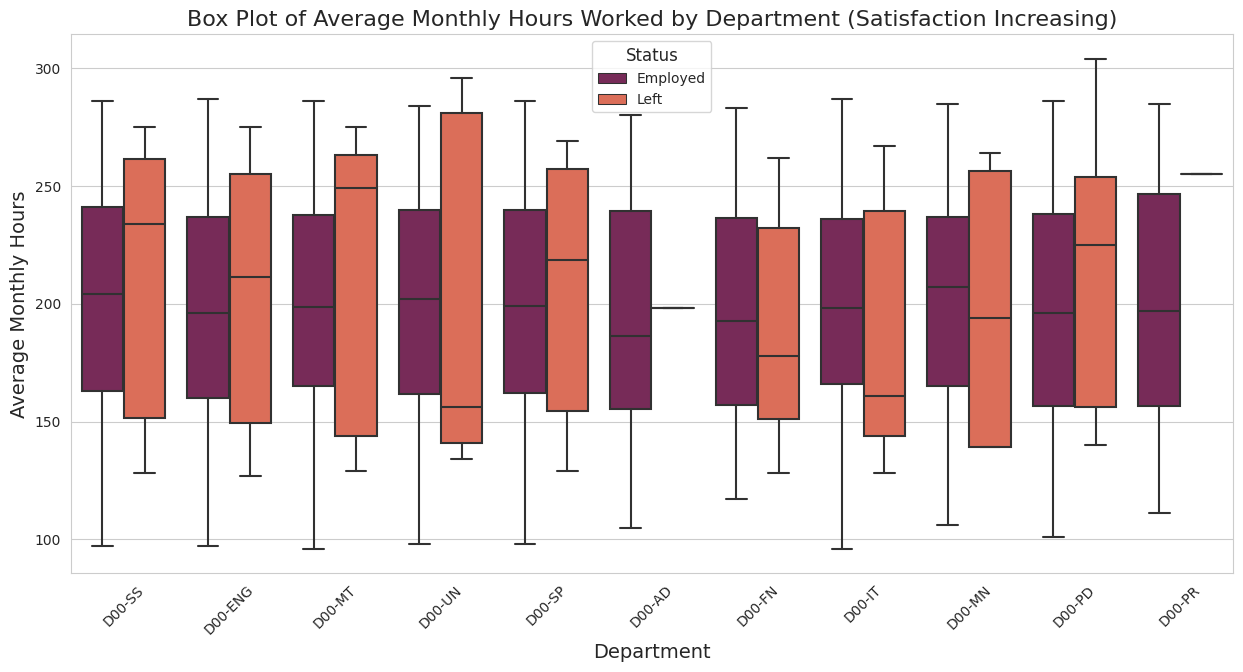

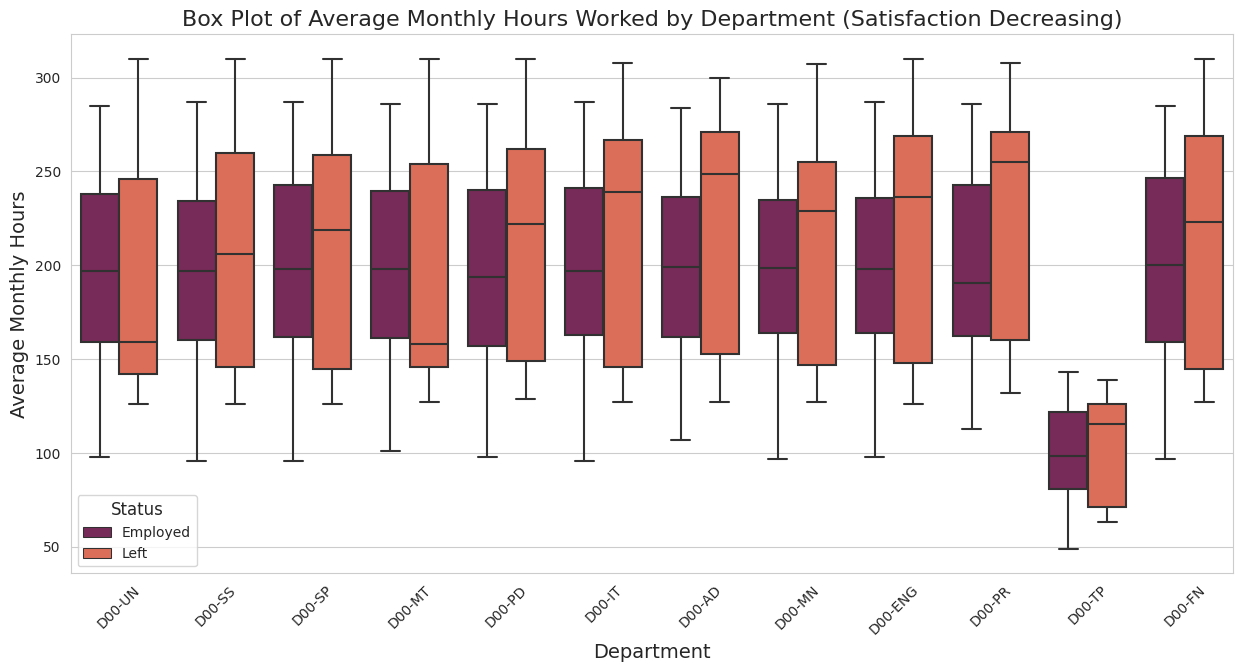

In [441]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a box plot for average monthly hours worked, hue by "status" and group by "department" for increasing satisfaction
plt.figure(figsize=(15, 7))

sns.boxplot(data=increasing_satisfaction, x="department", y="avg_monthly_hrs", hue="status", palette="rocket")

# Set plot labels and title for increasing satisfaction
plt.xlabel("Department", fontsize=14)
plt.ylabel("Average Monthly Hours", fontsize=14)
plt.title("Box Plot of Average Monthly Hours Worked by Department (Satisfaction Increasing)", fontsize=16)

# Show the plot for increasing satisfaction
plt.legend(title="Status", title_fontsize=12, fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

# Create a box plot for average monthly hours worked, hue by "status" and group by "department" for decreasing satisfaction
plt.figure(figsize=(15, 7))

sns.boxplot(data=decreasing_satisfaction, x="department", y="avg_monthly_hrs", hue="status", palette="rocket")

# Set plot labels and title for decreasing satisfaction
plt.xlabel("Department", fontsize=14)
plt.ylabel("Average Monthly Hours", fontsize=14)
plt.title("Box Plot of Average Monthly Hours Worked by Department (Satisfaction Decreasing)", fontsize=16)

# Show the plot for decreasing satisfaction
plt.legend(title="Status", title_fontsize=12, fontsize=10)
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

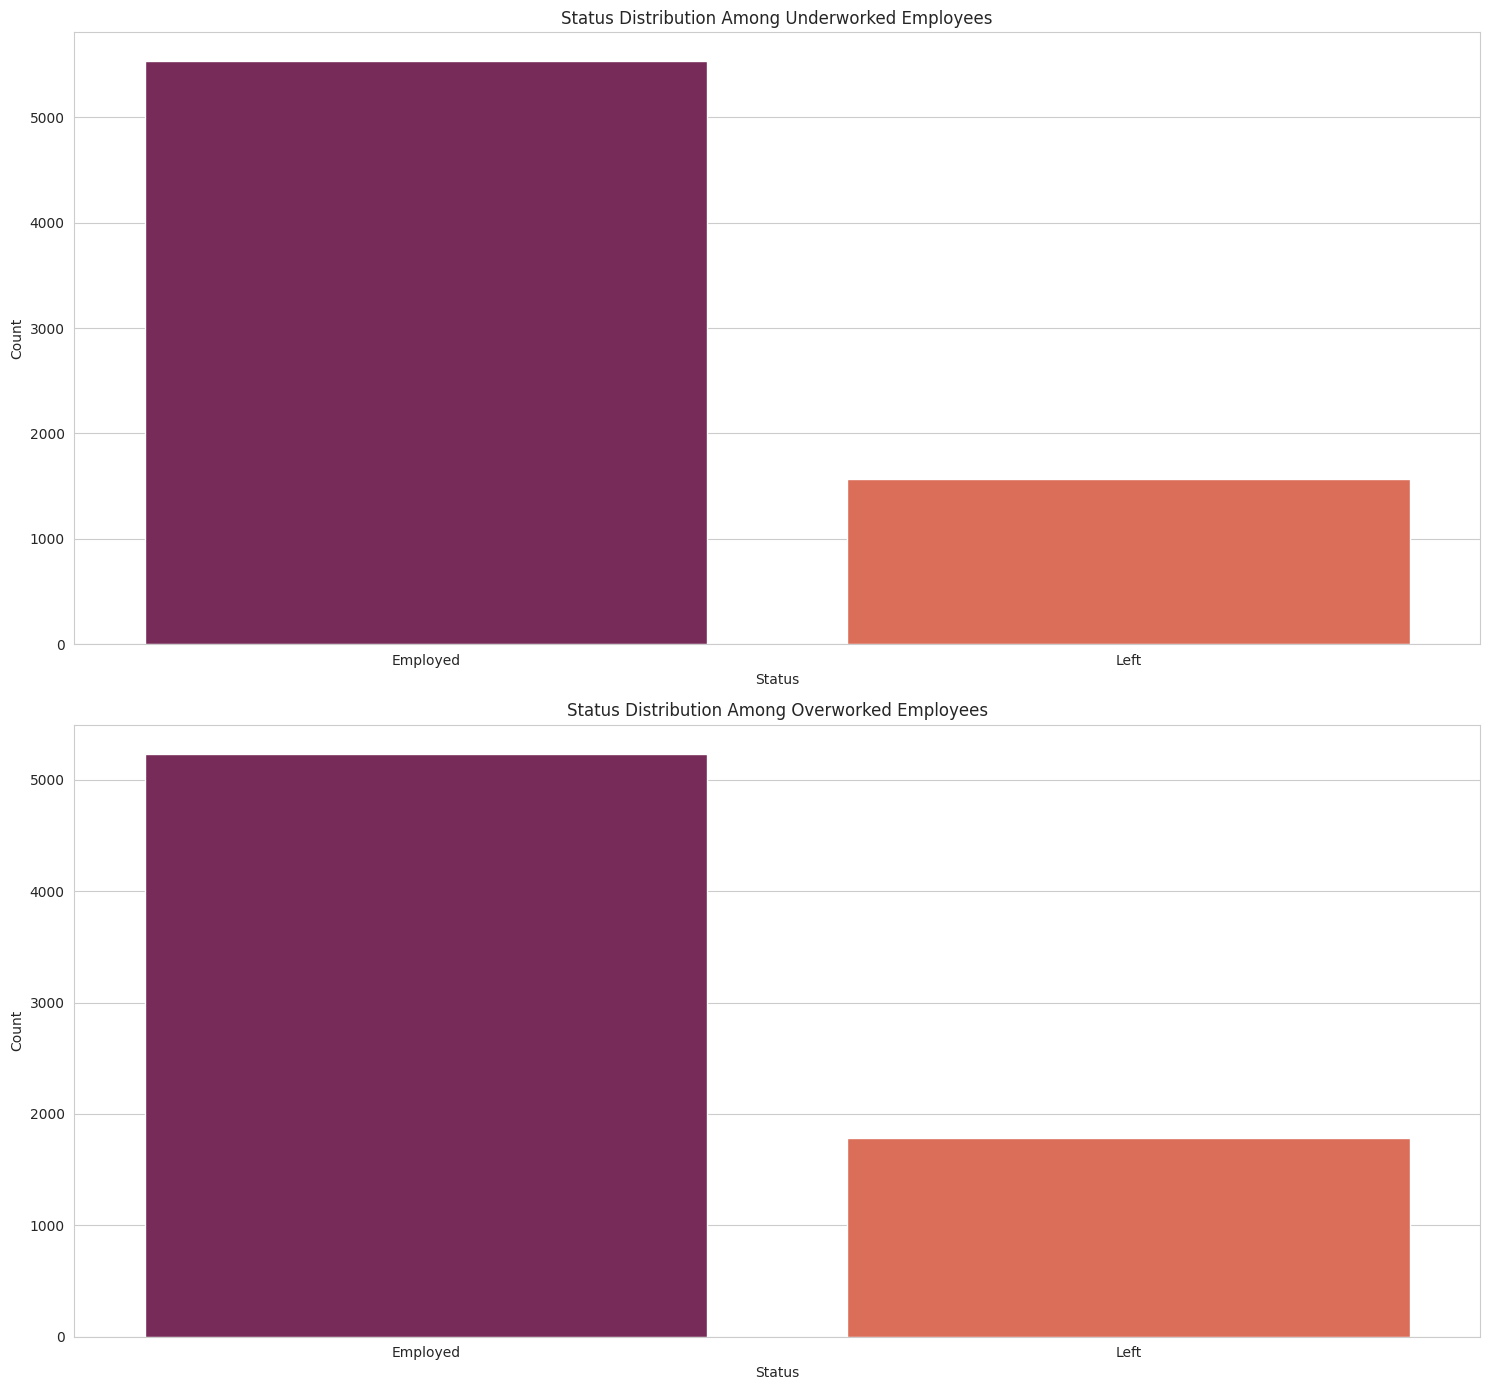

In [442]:
# Define the median value of average monthly hours worked
median_avg_monthly_hrs = df_train['avg_monthly_hrs'].median()

# Categorize average monthly hours
df_train['working_hours_category'] = pd.cut(df_train['avg_monthly_hrs'], 
                                           bins=[-np.inf, median_avg_monthly_hrs, np.inf],
                                           labels=['Underworked', 'Overworked'])

df_test['working_hours_category'] = pd.cut(df_test['avg_monthly_hrs'], 
                                          bins=[-np.inf, median_avg_monthly_hrs, np.inf],
                                          labels=['Underworked', 'Overworked'])

# Create two dataframes for underworked and overworked employees
underworked_df = df_train[df_train['working_hours_category'] == 'Underworked']
overworked_df = df_train[df_train['working_hours_category'] == 'Overworked']

# Create two subplots, one below the other
fig, axes = plt.subplots(2, 1, figsize=(15, 14))

# Plot for underworked employees
sns.countplot(data=underworked_df, x='status', palette="rocket", ax=axes[0])
axes[0].set_title('Status Distribution Among Underworked Employees')
axes[0].set_xlabel('Status')
axes[0].set_ylabel('Count')

# Plot for overworked employees
sns.countplot(data=overworked_df, x='status', palette="rocket", ax=axes[1])
axes[1].set_title('Status Distribution Among Overworked Employees')
axes[1].set_xlabel('Status')
axes[1].set_ylabel('Count')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

<a name = Section36></a>
### **3.6 Gender & Marital Status distribution Among Employees with Increasing/Decreasing Satisfaction**

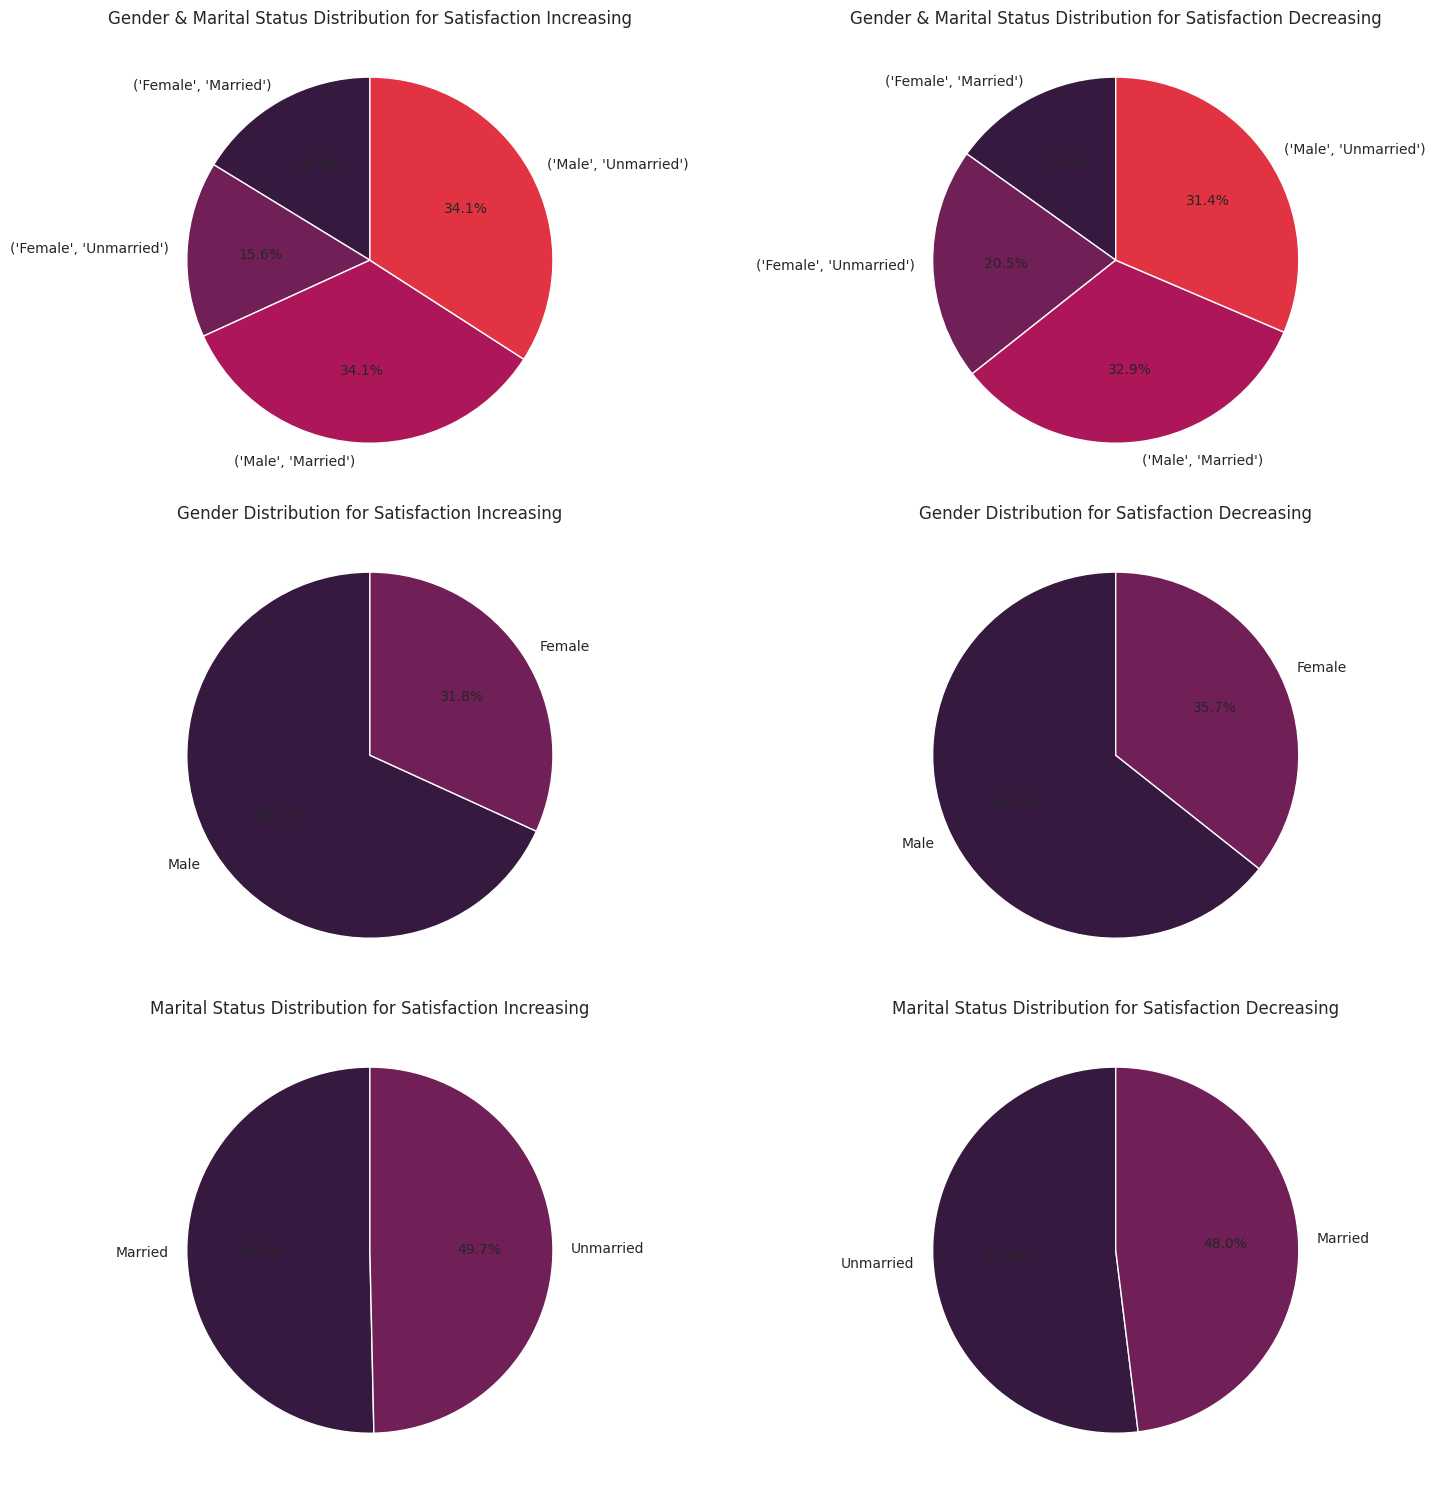

In [443]:
import matplotlib.pyplot as plt

# Create a 3x2 grid of subplots
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

# Gender & Marital Status Distribution for Employees with Satisfaction Increasing
gender_marital_increasing = increasing_satisfaction.groupby(['gender', 'marital_status']).size()
axes[0, 0].pie(gender_marital_increasing, labels=gender_marital_increasing.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender & Marital Status Distribution for Satisfaction Increasing')

# Gender & Marital Status Distribution for Employees with Satisfaction Decreasing
gender_marital_decreasing = decreasing_satisfaction.groupby(['gender', 'marital_status']).size()
axes[0, 1].pie(gender_marital_decreasing, labels=gender_marital_decreasing.index, autopct='%1.1f%%', startangle=90)
axes[0, 1].set_title('Gender & Marital Status Distribution for Satisfaction Decreasing')

# Pie chart for gender distribution among employees with satisfaction increasing
gender_distribution_increasing = increasing_satisfaction['gender'].value_counts()
axes[1, 0].pie(gender_distribution_increasing, labels=gender_distribution_increasing.index, autopct='%1.1f%%', startangle=90)
axes[1, 0].set_title('Gender Distribution for Satisfaction Increasing')

# Pie chart for gender distribution among employees with satisfaction decreasing
gender_distribution_decreasing = decreasing_satisfaction['gender'].value_counts()
axes[1, 1].pie(gender_distribution_decreasing, labels=gender_distribution_decreasing.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Gender Distribution for Satisfaction Decreasing')

# Pie chart for marital status distribution among employees with satisfaction increasing
marital_status_distribution_increasing = increasing_satisfaction['marital_status'].value_counts()
axes[2, 0].pie(marital_status_distribution_increasing, labels=marital_status_distribution_increasing.index, autopct='%1.1f%%', startangle=90)
axes[2, 0].set_title('Marital Status Distribution for Satisfaction Increasing')

# Pie chart for marital status distribution among employees with satisfaction decreasing
marital_status_distribution_decreasing = decreasing_satisfaction['marital_status'].value_counts()
axes[2, 1].pie(marital_status_distribution_decreasing, labels=marital_status_distribution_decreasing.index, autopct='%1.1f%%', startangle=90)
axes[2, 1].set_title('Marital Status Distribution for Satisfaction Decreasing')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

<a name = Section37></a>
### **3.7 Income Level vs. Job Satisfaction**

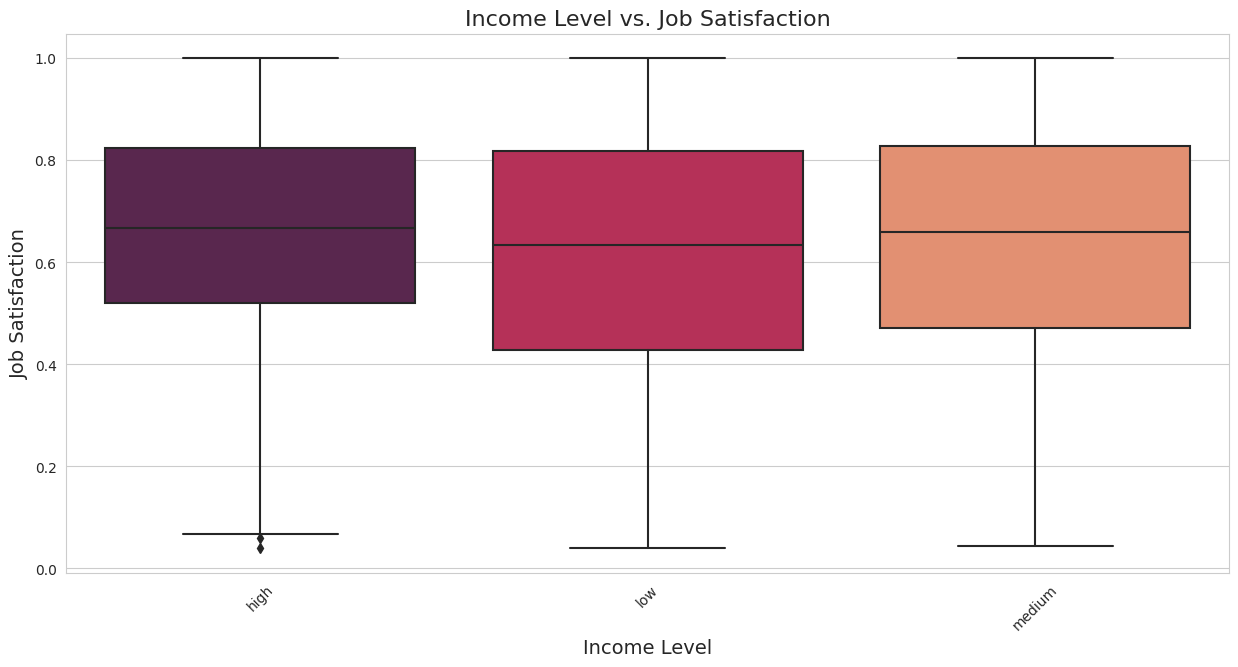

In [444]:
# Set the style of the plot
sns.set_style("whitegrid")

# Create a box plot for income level vs. job satisfaction
plt.figure(figsize=(15, 7))
sns.boxplot(data=df_train, x="salary", y="satisfaction", palette="rocket")

# Set plot labels and title
plt.xlabel("Income Level", fontsize=14)
plt.ylabel("Job Satisfaction", fontsize=14)
plt.title("Income Level vs. Job Satisfaction", fontsize=16)

# Show the plot
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.show()

<a name = Section38></a>
### **3.8 Employment Tenure Distribution**

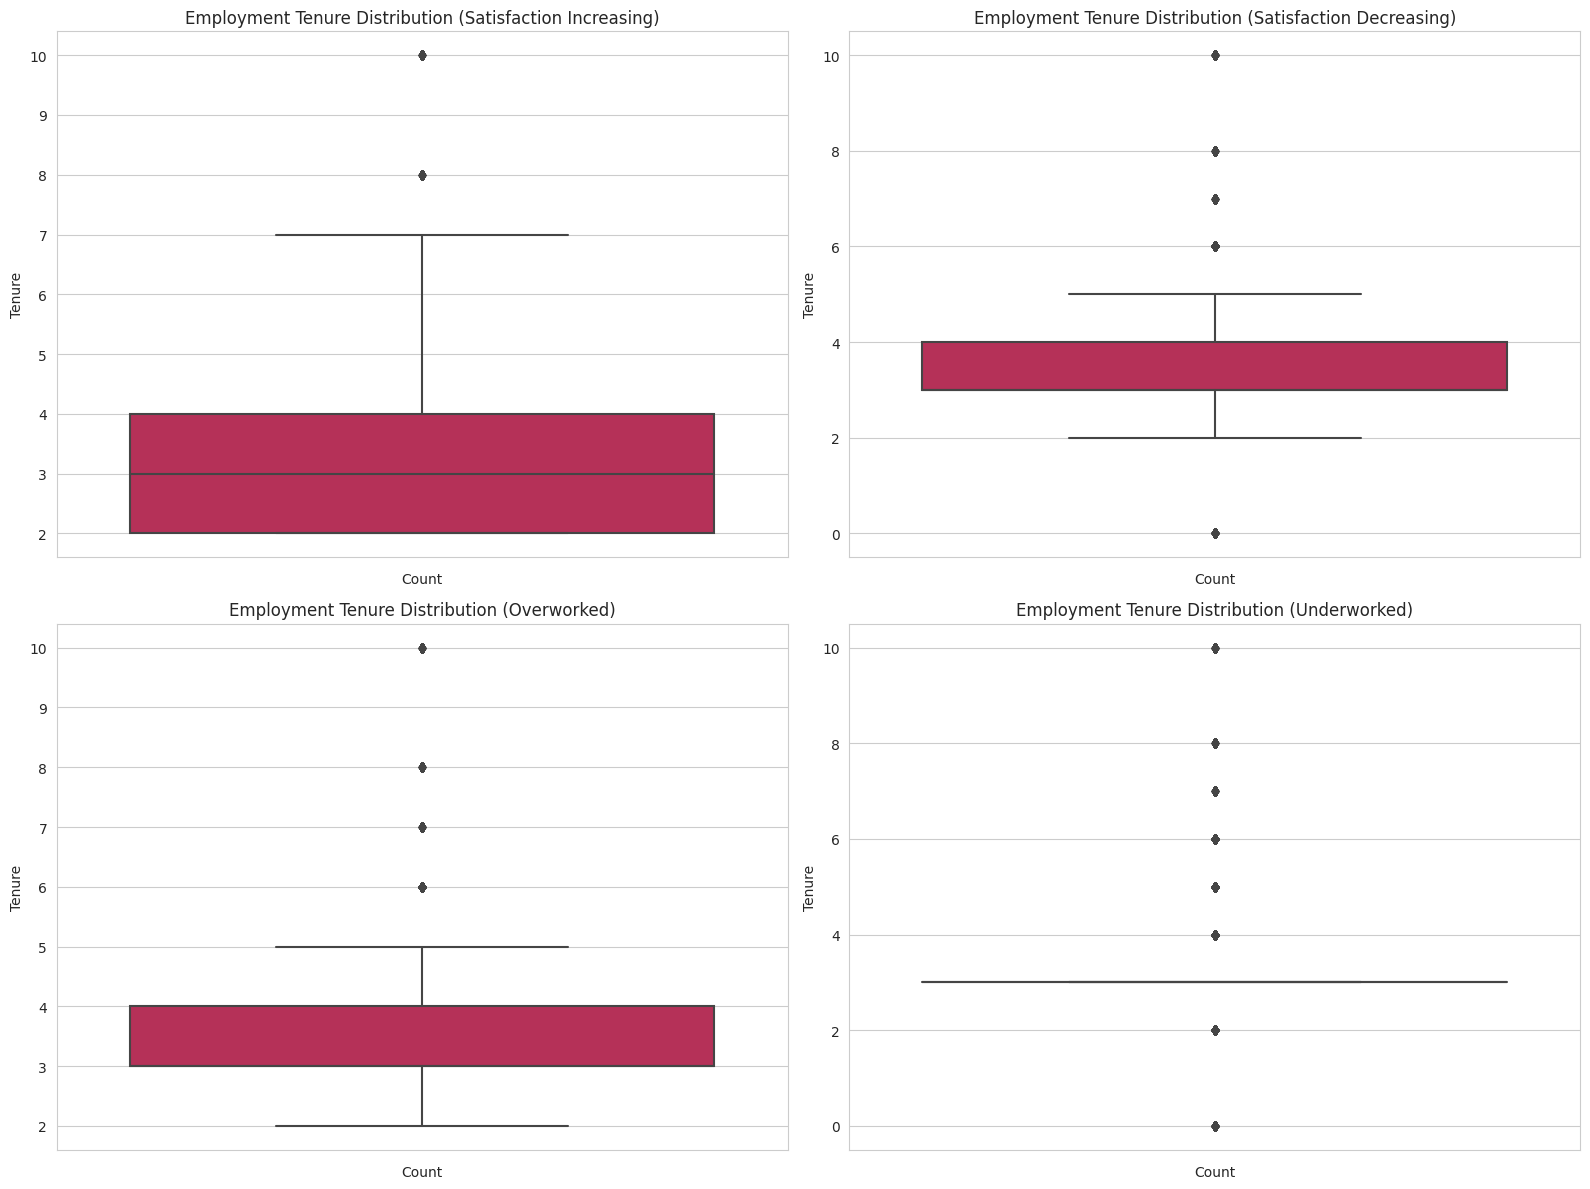

In [445]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Plot employment tenure distribution for employees with increasing satisfaction
sns.boxplot(data=increasing_satisfaction, y='tenure', ax=axes[0, 0], palette="rocket")
axes[0, 0].set_title('Employment Tenure Distribution (Satisfaction Increasing)')
axes[0, 0].set_xlabel('Count')
axes[0, 0].set_ylabel('Tenure')

# Plot employment tenure distribution for employees with decreasing satisfaction
sns.boxplot(data=decreasing_satisfaction, y='tenure', ax=axes[0, 1], palette="rocket")
axes[0, 1].set_title('Employment Tenure Distribution (Satisfaction Decreasing)')
axes[0, 1].set_xlabel('Count')
axes[0, 1].set_ylabel('Tenure')

# Plot employment tenure distribution for overworked employees
sns.boxplot(data=overworked_df, y='tenure', ax=axes[1, 0], palette="rocket")
axes[1, 0].set_title('Employment Tenure Distribution (Overworked)')
axes[1, 0].set_xlabel('Count')
axes[1, 0].set_ylabel('Tenure')

# Plot employment tenure distribution for underworked employees
sns.boxplot(data=underworked_df, y='tenure', ax=axes[1, 1], palette="rocket")
axes[1, 1].set_title('Employment Tenure Distribution (Underworked)')
axes[1, 1].set_xlabel('Count')
axes[1, 1].set_ylabel('Tenure')

# Adjust subplot spacing
plt.tight_layout()

# Show the plots
plt.show()

---
<a name = Section4></a>
# **4. Employee Attrition Prediction Model**
---

In [446]:
# Making a copy of the Dataset incase it needs to be reffered back to
df_train_og = df_train.copy(deep=True)
df_test_og = df_test.copy(deep=True)

In [447]:
# Define a mapping for 'status' column
status_mapping = {'Left': 1, 'Employed': 0}

# Apply the mapping to the 'status' column in df_train
df_train['status'] = df_train['status'].map(status_mapping)

# Check the updated 'status' column
print(df_train['status'].unique())

[1, 0]
Categories (2, int64): [0, 1]


In [448]:
print('Training Data Shape:',df_train.shape)
print('Test Data Shape:',df_test.shape)
print('\n' + '-'*25 + '\n')
print('Training Data Head')
print('\n' + '-'*10 + '\n')
df_train.head(10)

Training Data Shape: (14116, 19)
Test Data Shape: (100, 18)

-------------------------

Training Data Head

----------



,avg_monthly_hrs,department,filed_complaint,last_evaluation,n_projects,recently_promoted,salary,satisfaction,status,tenure,employee_id,age,gender,marital_status,dept_name_department,dept_head_department,satisfaction_change,satisfaction_change_category,working_hours_category
0,246,D00-UN,0,0.87,6,0,medium,0.13,1,4,124467,42,Female,Married,Unknown,Unknown,-0.73,Satisfaction Decreasing,Overworked
1,134,D00-UN,0,0.56,2,0,low,0.51,1,3,112210,23,Female,Unmarried,Unknown,Unknown,-0.04,Satisfaction Decreasing,Underworked
2,156,D00-SS,1,0.47,2,0,medium,0.41,1,3,126150,24,Female,Unmarried,Sales,Edward J Bayley,-0.07,Satisfaction Decreasing,Underworked
3,256,D00-SP,0,0.96,6,0,low,0.15,1,4,125346,51,Female,Married,Support,Amelia Westray,-0.81,Satisfaction Decreasing,Overworked
4,146,D00-SS,0,0.51,2,0,medium,0.43,1,3,113707,23,Female,Unmarried,Sales,Edward J Bayley,-0.07,Satisfaction Decreasing,Underworked
5,135,D00-MT,0,0.48,2,0,low,0.38,1,3,121685,23,Female,Unmarried,Marketing,Reuben Swann,-0.10,Satisfaction Decreasing,Underworked
6,270,D00-PD,0,0.87,6,0,low,0.17,1,4,119912,24,Female,Unmarried,Product,Darcy Staines,-0.69,Satisfaction Decreasing,Overworked
7,244,D00-IT,0,0.93,6,0,medium,0.06,1,5,112868,29,Female,Married,IT,Henry Adey,-0.86,Satisfaction Decreasing,Overworked
8,289,D00-IT,0,0.93,7,0,low,0.16,1,4,122314,36,Female,Married,IT,Henry Adey,-0.77,Satisfaction Decreasing,Overworked
9,281,D00-SS,0,0.91,6,0,medium,0.11,1,4,122394,50,Female,Married,Sales,Edward J Bayley,-0.80,Satisfaction Decreasing,Overworked


In [449]:
# Split the data into X (features) and y (target variable), dropping 'employee_id'
X = df_train.drop(['status'], axis=1)
y = df_train['status']

In [450]:
X = X.drop(['employee_id','satisfaction_change_category'], axis=1)
df_test = df_test.drop(['employee_id', 'satisfaction_change_category'], axis=1)

In [451]:
X.isnull().sum()

avg_monthly_hrs           0
department                0
filed_complaint           0
last_evaluation           0
n_projects                0
recently_promoted         0
salary                    0
satisfaction              0
tenure                    0
age                       0
gender                    0
marital_status            0
dept_name_department      0
dept_head_department      0
satisfaction_change       0
working_hours_category    0
dtype: int64

<a name = Section41></a>
### **4.1 Feature Selection with Correlation Matrix**

In [452]:
# Create a correlation matrix between all features and status
corr_matrix = X.corrwith(y)

# Split the correlations into two lists based on positive or negative correlation
neg_corr = corr_matrix[corr_matrix > 0].sort_values(ascending=False)
pos_corr = corr_matrix[corr_matrix < 0].sort_values()

# Multiply the correlations by 100 to express them as percentages
neg_corr = neg_corr * 100
pos_corr = pos_corr * -100

# Print the results
print("Sorted list of Negatively correlated features with status (in percentage):\n")
print(neg_corr)
print("\nSorted List of Positively correlated features with status (in percentage):\n")
print(pos_corr)

Sorted list of Negatively correlated features with status (in percentage):

tenure            14.38
avg_monthly_hrs    7.36
last_evaluation    3.87
n_projects         2.66
dtype: float64

Sorted List of Positively correlated features with status (in percentage):

satisfaction          38.67
satisfaction_change   35.82
filed_complaint       15.76
recently_promoted      6.10
age                    5.16
dtype: float64


In [453]:
# Set the threshold for dropping columns
threshold = 7.5

# Identify the columns below the threshold and drop them
columns_to_drop = neg_corr[neg_corr < threshold].index.tolist() + pos_corr[pos_corr < threshold].index.tolist()

# Drop the columns only if they exist in the dataset
X = X.drop(columns=columns_to_drop)
df_test = df_test.drop(columns=columns_to_drop, errors='ignore')

# Print the updated dataset
X.head()

,department,filed_complaint,salary,satisfaction,tenure,gender,marital_status,dept_name_department,dept_head_department,satisfaction_change,working_hours_category
0,D00-UN,0,medium,0.13,4,Female,Married,Unknown,Unknown,-0.73,Overworked
1,D00-UN,0,low,0.51,3,Female,Unmarried,Unknown,Unknown,-0.04,Underworked
2,D00-SS,1,medium,0.41,3,Female,Unmarried,Sales,Edward J Bayley,-0.07,Underworked
3,D00-SP,0,low,0.15,4,Female,Married,Support,Amelia Westray,-0.81,Overworked
4,D00-SS,0,medium,0.43,3,Female,Unmarried,Sales,Edward J Bayley,-0.07,Underworked


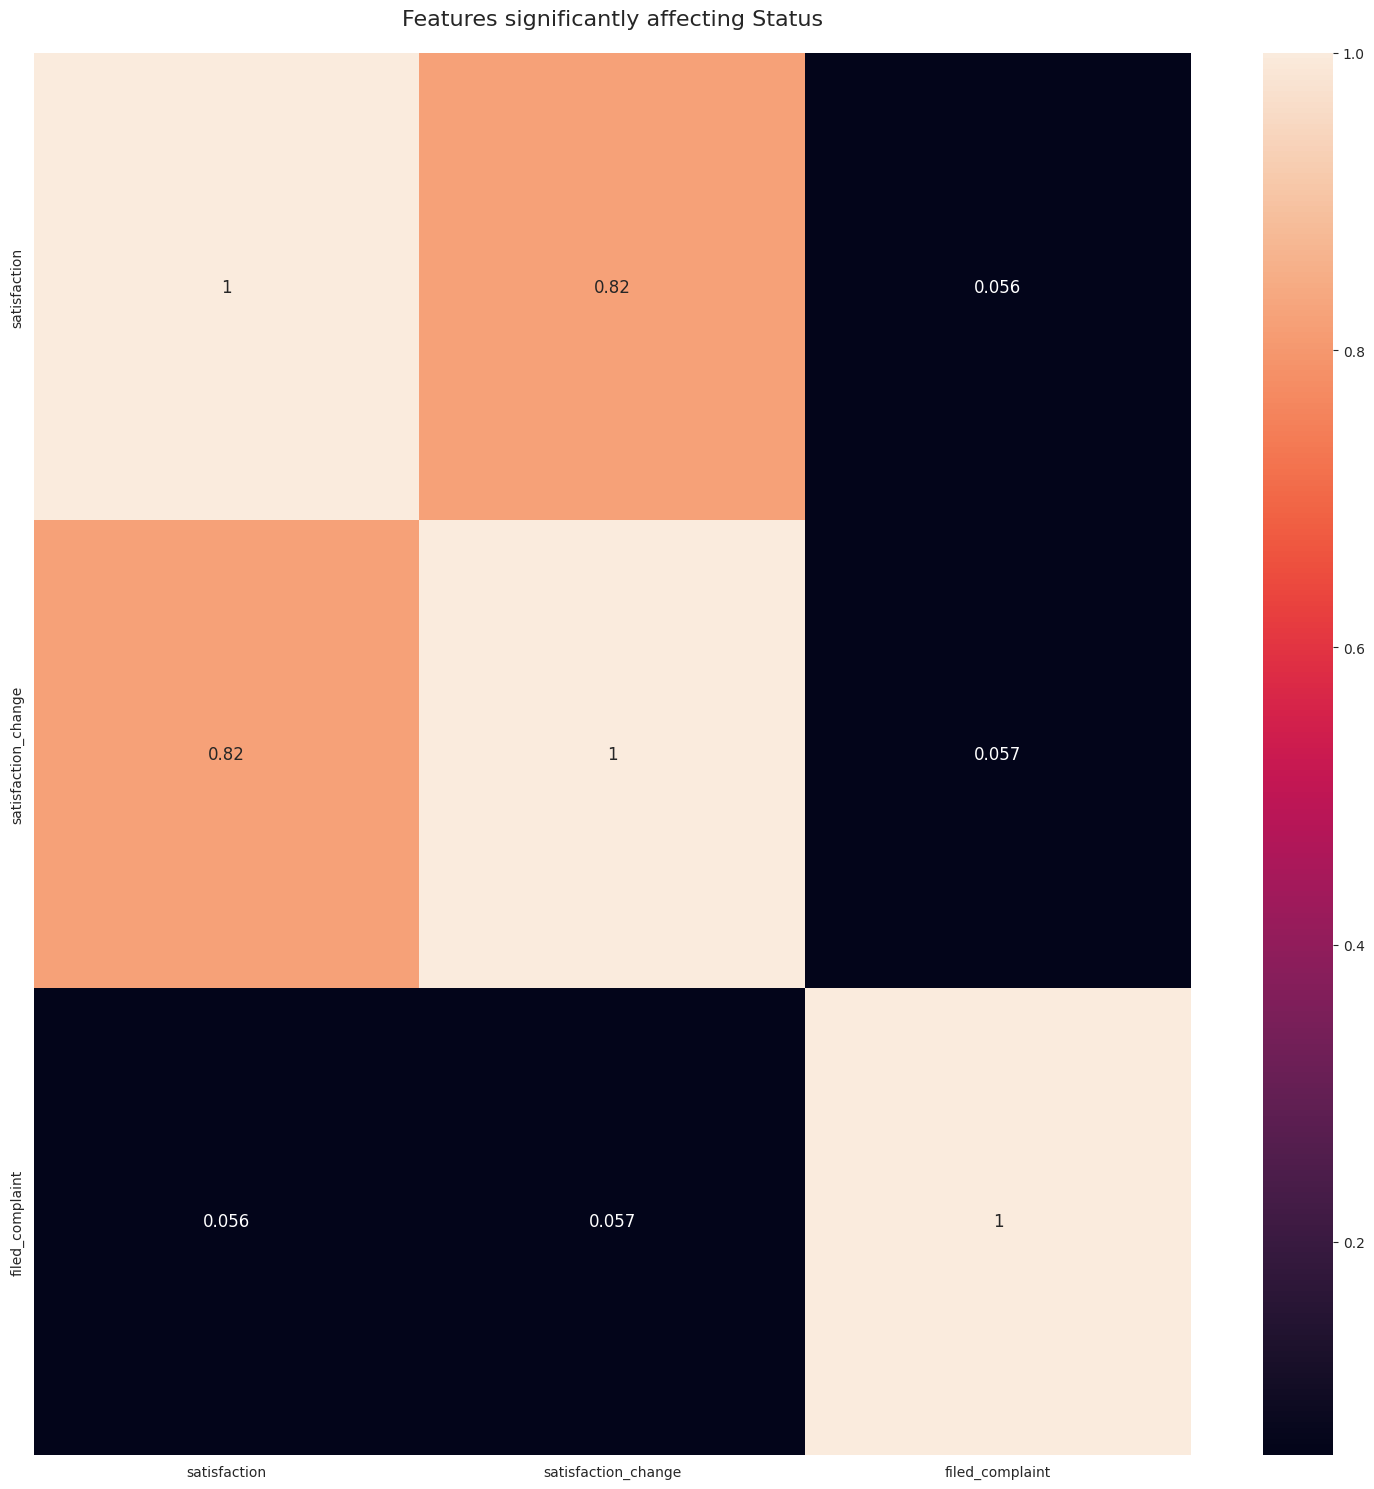

In [454]:
# Updating the pos_corr list to exclude features not present in X
pos_corr = pos_corr[pos_corr.index.isin(X.columns)]

# Set figure size
plt.figure(figsize=(15, 15))

# Plot heatmap of positively correlated features with net worth
sns.heatmap(X[pos_corr.index].corr(), annot=True, cmap='rocket', annot_kws={'fontsize': 12})
plt.title('Features significantly affecting Status', fontsize=16, pad=20)

# Adjust the plot layout
plt.tight_layout()
plt.show()

<a name = Section42></a>
### **4.2 Encoding Categorical Variables**

In [460]:
X['working_hours_category'].value_counts()

Underworked    7101
Overworked     7015
Name: working_hours_category, dtype: int64

In [456]:
# Combine 'X' and 'df_test' to fit the label encoder
combined_data = pd.concat([X, df_test], axis=0)

# Initialize label encoder for binary/ordinal columns
label_encoder = LabelEncoder()

# List of columns to one-hot encode

one_hot_cols = ['department', 'dept_name_department', 'dept_head_department', 'salary']

# Iterate through the categorical columns
for col in categorical_cols:
    unique_values = combined_data[col].unique()
    num_unique = len(unique_values)

    # Define a threshold for one-hot encoding (set to 2 for binary columns)
    one_hot_threshold = 2

    if num_unique <= one_hot_threshold:
        # Use label encoding for binary columns
        combined_data[col] = label_encoder.fit_transform(combined_data[col])
    else:
        # Add to the list of columns to one-hot encode
        one_hot_cols.append(col)

# Perform one-hot encoding for columns in one_hot_cols
combined_data = pd.get_dummies(combined_data, columns=one_hot_cols, drop_first=True)

# Split the combined data back into 'X' and 'df_test'
X = combined_data.iloc[:X.shape[0], :]
df_test = combined_data.iloc[X.shape[0]:, :]

<a name = Section43></a>
### **4.3  Balancing Dataset with SMOTE**

In [461]:
X.head()

,filed_complaint,satisfaction,tenure,gender,marital_status,satisfaction_change,working_hours_category,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_D00-UN,dept_name_department_Engineering,dept_name_department_Finance,dept_name_department_IT,dept_name_department_Management,dept_name_department_Marketing,dept_name_department_Procurement,dept_name_department_Product,dept_name_department_Sales,dept_name_department_Support,dept_name_department_Temp,dept_name_department_Unknown,dept_head_department_Amelia Westray,dept_head_department_Darcy Staines,dept_head_department_Edward J Bayley,dept_head_department_Ellie Trafton,dept_head_department_Evelyn Tolson,dept_head_department_Henry Adey,dept_head_department_Louie Viles,dept_head_department_Micheal Zachrey,dept_head_department_Reuben Swann,dept_head_department_Sushant Raghunathan K,dept_head_department_Unknown,salary_low,salary_medium,department_D00-ENG,department_D00-FN,department_D00-IT,department_D00-MN,department_D00-MT,department_D00-PD,department_D00-PR,department_D00-SP,department_D00-SS,department_D00-TP,department_D00-UN,dept_name_department_Engineering,dept_name_department_Finance,dept_name_department_IT,dept_name_department_Management,dept_name_department_Marketing,dept_name_department_Procurement,dept_name_department_Product,dept_name_department_Sales,dept_name_department_Support,dept_name_department_Temp,dept_name_department_Unknown,dept_head_department_Amelia Westray,dept_head_department_Darcy Staines,dept_head_department_Edward J Bayley,dept_head_department_Ellie Trafton,dept_head_department_Evelyn Tolson,dept_head_department_Henry Adey,dept_head_department_Louie Viles,dept_head_department_Micheal Zachrey,dept_head_department_Reuben Swann,dept_head_department_Sushant Raghunathan K,dept_head_department_Unknown
0,0,0.13,4,0,0,-0.73,Overworked,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
1,0,0.51,3,0,1,-0.04,Underworked,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
2,1,0.41,3,0,1,-0.07,Underworked,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0.15,4,0,0,-0.81,Overworked,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.43,3,0,1,-0.07,Underworked,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [458]:
class_counts = df_train['status'].value_counts()
class_counts

0    10761
1     3355
Name: status, dtype: int64

In [459]:
# Perform oversampling using SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

ValueError: could not convert string to float: 'Overworked'

<a name = Section44></a>
### **4.4 Feature Scaling**

In [ ]:
# Create a scaler object
scaler = StandardScaler()

# Extract numerical columns for scaling
numerical_cols = X.select_dtypes(['int', 'float']).columns

# Scale the numerical columns in the training data
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

# Scale the numerical columns in the test data
df_test[numerical_cols] = scaler.transform(df_test[numerical_cols])

---
<a name = Section5></a>
# **5. Model Development & Evaluation**
---

In [ ]:
# Split the data into training and development sets
x_train, x_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=77, stratify=y)

In [ ]:
# Initialize classifiers
log_clf = LogisticRegression(random_state = 77, class_weight='balanced')
sv_clf = SVC(random_state=77, class_weight='balanced', probability=True)
dt_clf = DecisionTreeClassifier(random_state = 77, class_weight='balanced')
rf_clf = RandomForestClassifier(n_estimators=500, random_state = 77, class_weight='balanced', n_jobs=-1)
gb_clf = GradientBoostingClassifier(n_estimators=500, random_state = 77)
nb_clf = GaussianNB()

In [ ]:
%%time
# Intialize a list of classifier objects
clf_list = [log_clf, sv_clf, dt_clf, rf_clf, gb_clf, nb_clf]

# Create an empty list to append F1 scores and classifier names
train_f1_scores = []
dev_f1_scores = []
clf_names = []

# Train classifiers over the train data and append F1 scores to the empty lists
for clf in clf_list:
    # Fit the train data to the classifier object
    clf.fit(x_train, y_train)
  
    # Predict the train and dev labels
    train_preds = clf.predict(x_train)
    dev_preds = clf.predict(x_dev)

    # Calculate the train and dev F1 scores
    train_f1 = f1_score(y_train, train_preds, average='macro')
    dev_f1 = f1_score(y_dev, dev_preds, average='macro')
    
    # Append train and dev F1 scores to the empty lists
    train_f1_scores.append(np.round(a=train_f1, decimals=4))
    dev_f1_scores.append(np.round(a=dev_f1, decimals=4))
    clf_names.append(clf.__class__.__name__)

In [ ]:
# Create an F1 score dataframe from the scores and names list
f1_score_frame = pd.DataFrame(data={'Training Set F1 Scores': train_f1_scores, 'Dev Set F1 Scores': dev_f1_scores}, index=clf_names)

# View the F1 scores of all the classifiers
f1_score_frame.transpose()

---
<a name = Section6></a>
# **6. Submission**
---

In [ ]:
# Find the index of the classifier with the highest dev F1 score
best_index = np.argmax(dev_f1_scores)
best_classifier_name = clf_names[best_index]

# Use the best classifier to predict probability on df_test
best_classifier = clf_list[best_index]
test_probabilities = best_classifier.predict_proba(df_test)[:, 1]  # Select the probability of class 1 (employees leaving)

# Create a new DataFrame for submission
submission_df = pd.DataFrame()

# Add 'employee_id' column from df_test_og to the submission DataFrame
submission_df['employee_id'] = df_test_og['employee_id']

# Add the predicted probabilities column to the submission DataFrame
submission_df['leave_prob'] = test_probabilities  

# Save the submission DataFrame to a CSV file without index and header
submission_df.to_csv('submission.csv', index=False, header=False)

---
<a name = Section7></a>
# **7. Recommendations and Action Plan**
---

<a name = Section71></a>
### **7.1 Proactive HR Strategies**

<a name = Section72></a>
### **7.2 Retention Policy Recommendations**

<a name = Section73></a>
### **7.3 Communication and Feedback Loop**

<center>
  <a href="https://thedatascienceguy.go.studio/">
    <img src="https://raw.githubusercontent.com/Mihir-Ai-lab/The_Data_Science_Guy/main/Images/Notebook%20Footer.png" width="1200" height="627" />
  </a>
</center>